# Table of Contents
* [Problème de clustering](#chapter1)
* [Modèle de mélange gaussien](#chapter2)
    * [Définition](#section_2_1)
    * [Simulation de données d'un mélange gaussien](#section_2_2)
* [Clustering des données](#chapter3)
    * [Clustering à theta connu](#section_3_1)
    * [Estimation de theta](#section_3_2)
    * [Algorithme CEM](#section_3_3)
* [Application sur des données](#chapter4)

Le clustering des données est la tâche de partitionner des observations en groupes de valeurs
similaires. Dans ce projet, l’algorithme de clustering, dit CEM, qui repose sur la modélisation par un
mélange gaussien est présenté. L’objectif est la mise en oeuvre de cet algorithme et son évaluation sur
des données.



# 1. Problème de clustering

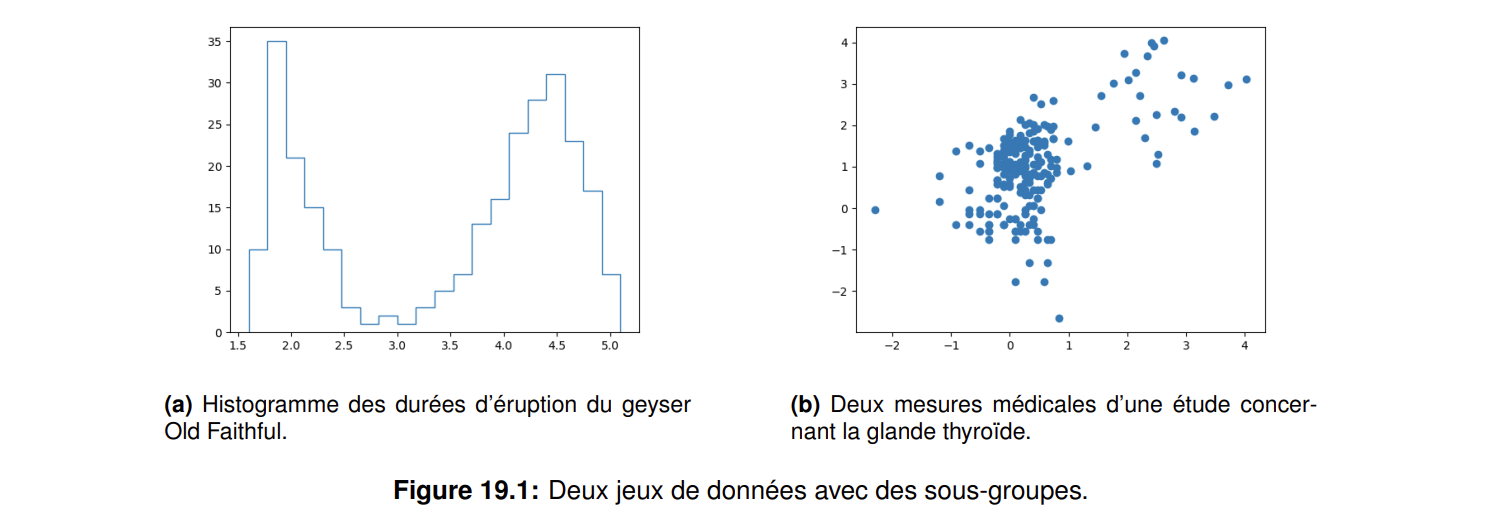

Des nombreux jeux de données sont constituées de plusieurs sous-populations. La figure **19.1 a)** montre des données sur le geyser Old Faithful, situé dans le parc national de Yellowstone. Ce geyser produit l’un des plus grands jets d’eau chaude et de vapeur au monde. Nous disposons d’un jeu de données contenant des informations sur 271 éruptions consécutives. L’histogramme de la figure **19.1 a)** montre les durées d’éruptions et on observe clairement deux types d’éruptions de durées sensiblement différentes. On pourrait dire qu’il s’agit de deux gaussiennes avec des moyennes différentes. Cependant, il n’y a pas de distinction nette entre les groupes, car quelques observations tombent entre les deux.


La figure **19.1 b)** montre des données d’une étude médicale sur la glande thyroïde. Un groupe de 215 patients a passé des tests dans le but de prédire si la thyroïde d’un patient peut être classée comme *euthyroïdie* (fonctionnement normal de la glande thyroïde), *hypothyroïdie* (thyroïde sous-active ne produisant pas suffisamment d’hormones thyroïdiennes) ou *hyperthyroïdie* (thyroïde hyperactive produisant et sécrétant des quantités excessives d’hormones thyroïdiennes libres T3 et/ou de thyroxine T4).

La figure **19.1 b)** représente deux mesures différente concernant la thyroïdostimuline observées sur les 215 patients. Le nuage des points n’a pas de forme simple ; par exemple, les données ne se concentrent pas autour d’un point (ce qui serait le cas si les données étaient par exemple générées par une loi normale), mais on distingue (au moins) deux groupes.


Une tâche centrale en apprentissage automatique est le partitionnement des données en plusieurs classes en regroupant les observations qui sont “proches”,
on parle de clustering. Dans la littérature, il existe de nombreuses approches différentes, pas forcément probabilistes. L’objectif de ce projet est la
mise en oeuvre d’une de ces méthodes, l’algorithme dit CEM (= classification EM algorithm une variante du célèbre algorithme EM), dans le cadre d’un mélange gaussien en dimension 1.

# 2. Modèle de mélange gaussien

Revenons à la figure **19.1 a)**. La forme de l’histogramme suggère que chaque  groupe est bien décrit par une loi normale. Cette idée est formalisée dans le modèle de mélange gaussien.




### 2.1 Définition

Le modèle de mélange gaussien fait partie des modèles à **variables latentes**. Des variables latentes, ou variables cachées, sont des variables aléatoires qui permettent de définir la loi des observations, mais elles ne sont pas observées.
Dans notre contexte, notons $X$ la variable aléatoire observée et $Z$ la variable latente associée qui représente l’appartenance de l’observation à un des groupes. Ainsi, $Z$ est une variable aléatoire discrète qui prend ses valeurs dans {1,...,K}, où K désigne le nombre de groupes (supposé connu dans ce projet). On a :

$$\mathbb{P}(Z = k) = \pi_k, k = 1, \cdots,K,$$

pour des paramètres $\pi = (\pi_1,\cdots, \pi_K)$ tels que $\Sigma_{k=1}^K\pi_k = 1$ et $\pi_k > 0$, $k = 1,⋯,K$. La variable $Z$ est
aussi appelée étiquette ou label de l’observation $X$.
Ensuite, on modélise la loi de $X$ conditionnellement à sa variable latente $Z$. Sachant que $Z = k$, on
suppose que l’observation $X$ suit une loi normale de moyenne $\mu_k\in\mathbb{R}$ et $\mu_k^2 >0$
, à savoir


$$X|(Z = k) \sim \mathcal{N}(\mu_k, \sigma_k).$$


Ainsi, on considère un ensemble de $K$ paramètres de la loi normale : {${(\mu_k, \sigma_k^2), k = 1,\cdots,K}$}. L’ensemble de paramètres d’un modèle de mélange gaussien est donné par


$$\theta = (\pi, \mu, \sigma^2) = ((\pi_1,\cdots,\pi_K), (\mu_1, \cdots,\mu_K), (\sigma_1^2, \cdots, \sigma_k^2)). $$

#### T1.
La loi jointe $\mathbb{P}_\theta$ de $(Z,X)$ admet une densité $\mathsf{p}_\theta$ par rapport à la mesure produit $\delta_{1, \cdots, K} \times \lambda$, où
$\delta_{1, \cdots, K}$ désigne la mesure de comptage sur {$1,\cdots,K$} et $\lambda$ la mesure de Lebesgue sur $\mathbb{R}$. Calculer la
densité $\mathbb{P}_\theta$ de $(Z,X)$ ainsi que la densité marginale de $X$, notée $\mathbb{f}_\theta$.

**Réponse :**


On a la densité conjointe $\mathbb{p}_\theta(Z,X)$ est donnée par :

$$\boxed{\mathbb{p}_\theta(Z=k,X=x) = f_{X|Z=k}(x) \ \mathbb{P}(Z=k)}$$


D'où


$$\mathbb{p}_\theta(Z=k,X=x) = \displaystyle \frac{1}{\sqrt{2π} σ_k} \ e^{\displaystyle -\frac{(x-μ_k)^2}{2 σ_k}}π_k$$


Pour obtenir la densité marginale de $X$ , nous devons sommer la densité conjointe sur toutes les valeurs possibles de $𝑍$  :


$$\boxed{f_θ(x)= \displaystyle \sum_{k=1}^{n}\frac{1}{\sqrt{2π} σ_k} \ e^{\displaystyle -\frac{(x-μ_k)^2}{2 σ_k}}π_k} $$

### 2.2 Simulation de données d’un modèle de mélange

La simulation d’une réalisation d’un mélange gaussien pour un paramètre $\theta$ se fait tout naturellement en simulant d’abord la variable latente $Z$, et ensuite, conditionnellement à $Z$, on simule l’observation $X$.

#### S1.
**[Génération de données d’un mélange gaussien]**. Écrire une fonction qui prend en argument
le paramètre $θ$ d’un mélange gaussien ainsi que la taille d’échantillon $n$. La fonction génère alors $n$
réalisations i.i.d. du modèle. Elle renvoie le vecteur d’observations $x = (x_1,\cdots, x_n)$ ainsi que le vecteur
des variables latentes $z = (z_1,\cdots, z_n)$. Pour tester la fonction, générer des données en variant le
paramètre $θ$ du modèle et tracer l’histogramme du modèle. On y superpose la densité du mélange.

In [1]:
# importation des bibliothèques dont on aura besoin
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr
import scipy.stats as sps
import pandas as pd
import warnings
import copy

In [2]:
# Question S1
def generation(theta, n):
    nb_groupe = len(theta[0])                                 # nombre de groupes/clusters
    espace_etat = [int(k) for k in range(0,nb_groupe)]        # groupe 0, 1, 2, ..., K
    probask = theta[0]                                        # probabilité de chaque groupe
    echantillonk = npr.choice(espace_etat, p=probask, size=n) # génération des variables latentes

    # Génération des observations
    x = [0 for i in range(0, n)]
    for i in range(0,n):
        x[i] = float(np.random.normal(theta[1][echantillonk[i]], np.sqrt(theta[2][echantillonk[i]]), 1)[0])
    return x, echantillonk

Puis on initialise deux $\theta$ différents :

In [3]:
theta1 = [[0.5, 0.5], [0, 7], [0.5, 0.5]]
theta2 = [[0.2, 0.1, 0.5, 0.2], [0, 13, 8, 4], [0.8, 0.5, 0.4, 0.1]]

Et on visualise pour theta1 et theta2 l'histogramme des données générées par 'generation'.

In [4]:
def histogramme_groupe(ax, nb_cluster, z, x):
  colors = ['blue', 'green', 'black', 'yellow', 'magenta', 'gray'] # liste de couleur par defaut

  # Comme en cours, on utilise la régle de Rice pour avoir un "bon" nombre de bins dans les histogrammes
  nb_bins = 2 * int(len(x)**(1./3.))

  # Partitionnement des points selon leur variables latentes
  data = [[] for i in range(nb_cluster)]
  for i in range(len(z)):
    for j in range(nb_cluster):
      if z[i] == j:
        data[j].append(x[i])

  # On superpose ("stacked = True") les histogrammes dont la couleur est définie par la variable latente
  ax.hist(data, bins=nb_bins, density=True, color=colors[:nb_cluster], stacked=True, label=["Catégorie "+str(i) for i in range(nb_cluster)])

On superpose à l'histogramme, la densité théorique du mélange gaussien pour vérifier le bon fonctionnement de la fonction.

In [5]:
def tracer_gaussienne(ax, theta, x, label):
  # On commence par déterminer la plage d'intérêt
  x_min, x_max = np.min(x), np.max(x)
  x_range = np.linspace(x_min, x_max, 100)

  # On affiche une première gaussienne qui portera le label
  ax.plot(x_range, theta[0][0]*sps.norm.pdf(x_range, theta[1][0], np.sqrt(theta[2][0])), color='black', linestyle='--', label=label)

  # On affiche les autres de la même couleur mais sans label pour éviter une redondance inutile dans la légende
  for gaussienne in range(1, len(theta[0])):
    y_theta = theta[0][gaussienne]*sps.norm.pdf(x_range, theta[1][gaussienne], np.sqrt(theta[2][gaussienne]))
    ax.plot(x_range, y_theta, color='black', linestyle='--')

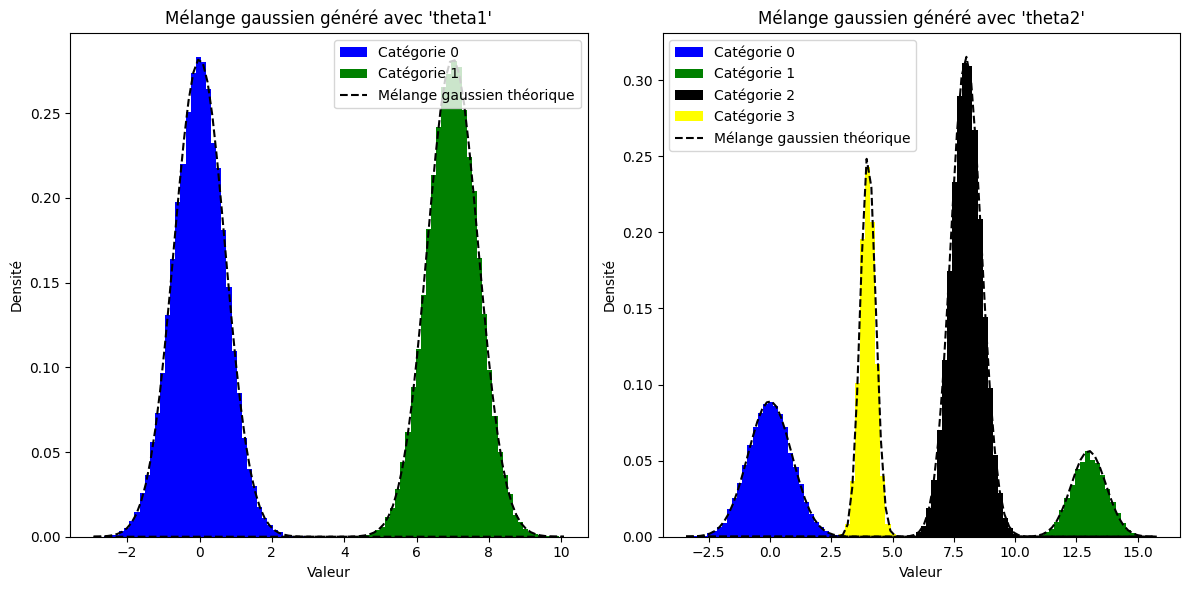

In [ ]:
# Structure de l'affichage
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Génération de 1 000 000 de données pour theta1 et theta2
n = 100000
x1, z1 = generation(theta1, n)
x2, z2 = generation(theta2, n)

# Affichage des histogrammes coloriés selon la variable latente
histogramme_groupe(ax1, len(theta1[0]), z1, x1)
histogramme_groupe(ax2, len(theta2[0]), z2, x2)

# Tracés des gaussiennes
tracer_gaussienne(ax1, theta1, x1, "Mélange gaussien théorique")
tracer_gaussienne(ax2, theta2, x2, "Mélange gaussien théorique")

# Mise en page...
ax1.legend(loc="upper right")
ax1.set_title("Mélange gaussien généré avec 'theta1'")
ax1.set_xlabel('Valeur')
ax1.set_ylabel('Densité')
ax2.legend(loc="upper left")
ax2.set_title("Mélange gaussien généré avec 'theta2'")
ax2.set_xlabel('Valeur')
ax2.set_ylabel('Densité')

# ... et affichage des graphiques
plt.tight_layout()
plt.show()

# 3. Clustering des données

Soient $(z_i, x_i)_{1\leq i\leq n}$ des réalisations i.i.d. de $(Z,X) \sim \mathbb{P}_θ$. Nous supposons que $x = (x_1,\cdots, x_n)$ est observées, et $z = (z_1,\cdots, z_n)$ ne l’est pas. Le paramètre $\theta$ du modèle est aussi supposé inconnu.
L’objectif est de faire du clustering des données $x$ en $K$ groupes en s’aidant de la modélisation par un mélange gaussien, ce qui revient à estimer les labels $z$.

### 3.1 Clustering à $\theta$ connu

Supposons pour un moment que le paramètre $θ$ du modèle de mélange gaussien qui a généré les données est connu. On peut alors considérer les probabilités conditionnelles $\mathbb{P}_\theta(Z = k|X = x)$ pour $k = 1,\cdots,K$. Il est naturel d’utiliser ces probabilités (aussi appelées probabilités a posteriori) pour en
déduire des estimateurs des labels en assignant à l’observations $x_i$ la classe $k$ telle que la probabilité conditionnelle $\mathbb{P}_\theta(Z_i = k|X_i = x_i)$ est maximale. Ainsi, on pose
$$\hat{z_i} = arg \space \max_{k\in(1, \cdots,K)} {P}_\theta(Z_i = k|X_i = x_i).$$
Ceci est l’**estimateur MAP** (= *maximum a posteriori*). Il est facile à calculer, pourvu que le paramètre $θ$ du modèle est connu (ce qui n’est pas le cas en pratique).

#### T2.
Montrer que les probabilités conditionnelles $\mathbb{P}_\theta(Z = k|X = x)$ pour $k = 1,\cdots,K$ sont données par
$$ \mathbb{P}_\theta(Z = k|X = x)= \frac{\pi_k \space {f}_{\mu_k, \sigma_k}(x)}{\sum_{l=1}^{K} \pi_l{f}_{\mu_l, \sigma_l}(x) } . $$
,
où ${f}{\mu, \sigma}$ désigne la densité de la loi normale $ \mathcal{N}(\mu, \sigma)$.

**Réponse :**

Pour calculer la probabilité conditionnelle $\mathbb{P}_\theta(Z = k|X = x)$, nous utilisons **la formule de Bayes**:

On a alors:
$$\mathbb{P}_\theta(Z = k|X = x) = \frac{\mathbb{P}_θ(Z=k,X=x)}{\mathbb{P}(Z=k)\ \mathbb{P}(X=x)} \ \mathbb{P}(Z=k)$$

Donc d'après **la formule de Bayes** et **la formule de probabilité totale**:
$$\mathbb{P}_\theta(Z = k|X = x) = \frac{\mathbb{P}(X=x|Z=k)}{\sum_{l=1}^{K} \pi_l \ \mathbb{P}(X=x|Z=l)} \ π_k$$

D'où:

$$\boxed{ \mathbb{P}_\theta(Z = k|X = x)= \frac{\pi_k \space {f}_{\mu_k, \sigma_k}(x)}{\sum_{l=1}^{K} \pi_l{f}_{\mu_l, \sigma_l}(x) }} . $$

#### S2.
**[MAP]**. Écrire une fonction qui prend en entrée un paramètre $\theta$ d’un mélange gaussien et un
vecteur d’observations $x$. La fonction renvoie le MAP clustering $(\hat{z}_1,\cdots, \hat{z}_n)$.

In [6]:
def map_clustering(theta, x, K):
    # On commence par extraire les paramètres du modèle de mélange gaussien
    pi = theta[0]
    mu = theta[1]
    sigma = theta[2]

    # On initialise le résultat
    z = []

    # On cherche les arguments qui maximisent la probabilité conditionnelle de la T2.
    for obsv in x:
      indicesmaxi = 0
      numerateurmaxi = 0
      for k in range(K):
        numerateur = pi[k] * sps.norm.pdf(obsv, mu[k], sigma[k])
        if numerateur > numerateurmaxi:
          numerateurmaxi = numerateur
          indicesmaxi = k
      z.append(indicesmaxi)

    return z

Et on vérifie le bon fonctionnement de la fonction pour theta1 et theta2 en affichant les tables de contingences.

In [ ]:
# Test S2
def testS2(theta):
    K = len(theta[0])                   # Nombre de groupe
    n = 10000                           # Nombre de données générées
    x, z = generation(theta, n)         # Génération des données

    # Comparaison de l'estimation des variables latentes avec les vraies valeurs
    table_de_contingence = pd.crosstab(z, map_clustering(theta,x, K), rownames=['Vraies valeurs'], colnames=['Estimations'])
    print(table_de_contingence)

print("Test avec 'theta1' : ")
testS2(theta1)

print("\n"+"_"*50+"\n")

print("Test avec 'theta2' : ")
testS2(theta2)

Test avec 'theta1' : 
Estimations        0     1
Vraies valeurs            
0               5131     0
1                  0  4869

__________________________________________________

Test avec 'theta2' : 
Estimations        0    1     2     3
Vraies valeurs                       
0               1951    0     0     0
1                  0  993     0     0
2                  0    1  5043     0
3                184    0     0  1828


Les estimations semblent plûtot bonnes vis à vis des vraies valeurs !

### 3.2  Estimation de $\theta$

Maintenant supposons pour un instant que les étiquettes z sont connus. Un estimateur de $\theta$ basé sur
les données complètes $(z, x)$ est l’estimateur du maximum de vraisemblance (EMV) défini par
$$\hat{\theta}= arg\space {max}_\theta\space l(\theta) \space \space o\grave{u} \space \space l(\theta) =
log \space p_{\theta}(z_i, x_i).$$

#### T3.
Montrer que pour l’EMV $\hat{θ} = (\hat{\pi}, \hat{\mu},\hat{\sigma})$  on trouve pour $k = 1,\cdots,K,$

$$
\hat{\pi}_k = \frac{n_k}{n}, \space où \space n_k = \sum_{i=1}^n1(z_i = k)
$$

$$
\hat{\mu}_k = \frac{1}{n_k}\sum_{i=1}^{n_k} 1(z_i = k)x_i
$$

$$
\hat{\sigma}_k = \frac{1}{n_k}\sum_{i=1}^{n} 1(z_i = k)(x_i - \hat{\mu}_k)^2
$$

**Réponse :**


### Densité conjointe $p_\theta(z, x)$

Pour une observation $(z_i, x_i)$, la densité conjointe est :

$$ p_\theta(z_i, x_i) = p(z_i) \cdot p(x_i \mid z_i) $$

D'après l'énoncé on a :

$$ p(z_i = k) = \pi_k $$
$$ p(x_i \mid z_i = k) = \frac{1}{\sqrt{2 \pi \sigma_k^2}} \exp \left( -\frac{(x_i - \mu_k)^2}{2 \sigma_k^2} \right) $$

Ainsi,

$$ p_\theta(z_i, x_i) = \pi_k \cdot \frac{1}{\sqrt{2 \pi \sigma_k^2}} \exp \left( -\frac{(x_i - \mu_k)^2}{2 \sigma_k^2} \right) $$

### Log-vraisemblance

La log-vraisemblance des données $(z, x)$ est :

$$ \log L(\theta) = \sum_{i=1}^{n} \log p_\theta(z_i, x_i) $$

En substituant $ p_\theta(z_i, x_i) $, nous obtenons :

$$ \log L(\theta) = \sum_{i=1}^{n} \left( \log \pi_{z_i} - \frac{1}{2} \log (2 \pi \sigma_{z_i}^2) - \frac{(x_i - \mu_{z_i})^2}{2 \sigma_{z_i}^2} \right) $$



---



### Estimation des paramètres

Pour maximiser la log-vraisemblance par rapport à $\pi_k$, $\mu_k$ et $\sigma_k^2$, nous prenons les dérivées partielles et on les égalise à zéro.

#### Pour $\hat{\pi}_k$ :

La log-vraisemblance des données $(z, x)$ est :

$$ \log L(\theta) = \sum_{i=1}^{n} \left( \log \pi_{z_i} - \frac{1}{2} \log (2 \pi \sigma_{z_i}^2) - \frac{(x_i - \mu_{z_i})^2}{2 \sigma_{z_i}^2} \right) $$

Les $\pi_i$ ne sont pas indépendants entre eux, on suppose que la derivée partielle de $\displaystyle \sum_{z_i \neq k}^{n}  \log \pi_{z_i}$ par rapport à $\pi_k$ n'est pas nulle, mais on fait l'hypothèse que la dérivée est une constante, dans ce cas la derivée partielle de la log-vraisemblance par rapport à $\pi_k$ est :

$$ \frac{\partial \log L(\theta)}{\partial \pi_k} = \sum_{i=1}^{n} \frac{1\{z_i = k\}}{\pi_k} - C $$

En égalisant à zéro, nous obtenons :

$$ \sum_{i=1}^{n} \frac{1\{z_i = k\}}{\pi_k} - C = 0 $$


Ce qui donne :

$$ \pi_k = \frac{\sum_{i=1}^{n} 1\{z_i = k\}}{C} $$

En utilisant la contrainte $\sum_{k=1}^{K} \pi_k = 1$, nous avons :

$$ \sum_{k=1}^{K} \pi_k = \sum_{k=1}^{K} \frac{\sum_{i=1}^{n} 1\{z_i = k\}}{C} = 1 $$

Donc,

$$ C = n $$

En substituant $C$ dans l'équation de $\pi_k$, nous obtenons :

$$ \pi_k = \frac{1}{n} \sum_{i=1}^{n} 1\{z_i = k\} = \frac{n_k}{n} $$
D'où:

$$ \boxed{\hat{\pi}_k = \frac{n_k}{n}} $$



---



#### Pour $\hat{\mu}_k$ :

La dérivée partielle de la log-vraisemblance par rapport à $\mu_k$ est :

$$ \frac{\partial \log L(\theta)}{\partial \mu_k} = \sum_{i=1}^{n} 1\{z_i = k\} \frac{x_i - \mu_k}{\sigma_k^2} $$

En égalisant à zéro et en résolvant pour $\mu_k$, nous obtenons :

$$ \mu_k = \frac{\sum_{i=1}^{n} 1\{z_i = k\} x_i}{\sum_{i=1}^{n} 1\{z_i = k\}} = \frac{1}{n_k} \sum_{i=1}^{n} 1\{z_i = k\} x_i $$

Donc:
$$ \boxed{\hat{\mu}_k = \frac{1}{n_k} \sum_{i=1}^{n} 1\{z_i = k\} x_i} $$



---



#### Pour $\hat{\sigma}_k^2$ :

La dérivée partielle de la log-vraisemblance par rapport à $\sigma_k^2\$ est :

$$ \frac{\partial \log L(\theta)}{\partial \sigma_k^2} = \sum_{i=1}^{n} 1\{z_i = k\} \left( \frac{(x_i - \mu_k)^2}{2 (\sigma_k^2)^2} - \frac{1}{2 \sigma_k^2} \right) $$

En égalisant à zéro et en résolvant pour $\sigma_k^2$, nous obtenons :

$$ \sigma_k^2 = \frac{\sum_{i=1}^{n} 1\{z_i = k\} (x_i - \mu_k)^2}{\sum_{i=1}^{n} 1\{z_i = k\}} = \frac{1}{n_k} \sum_{i=1}^{n} 1\{z_i = k\} (x_i - \mu_k)^2 $$

Alors:
$$ \boxed{\hat{\sigma}^2_k = \frac{1}{n_k} \sum_{i=1}^{n} 1\{z_i = k\} (x_i - \hat{\mu}_k)^2} $$

#### S3.
**[EMV]**. Écrire une fonction qui renvoie l’EMV $\hat{θ}$. Elle prend en argument un vecteur d’observations $x$ et un vecteur de variables latentes $z$. Pour éviter des problèmes numériques, ajouter une vérification qu’aucune des variance $\hat{\sigma}_k^2$ ne vaut 0. Si c’est le cas, remplacer par une petit valeur positive, à savoir,
poser $\hat{\sigma}_k^2 = ϵ$ avec p. ex. $ϵ= 0.001$.

**Réponse :**

Nous avons choisi de travailler en deux temps, en calculant d'abord dans un premier temps $\hat{\pi}_k$ et $\hat{\mu}_k$ puis dans un second temps $\hat{\sigma}_k$ car le calcul de ce dernier nécessite la donnée de $\hat{\mu}_k$.

In [7]:
def emv(x, z, K):
    eps = 0.001     # Valeur à utiliser si la variance est nulle
    n = len(x)      # nombre d'observations

    # Initialisation des estimateurs
    pi_esti = [0] * K
    mu_esti = [0] * K
    sigma_esti = [0] * K

    # Calculer les estimateurs EMV pour chaque classe
    for k in range(K):
        # Initialiser les variables pour la classe k
        n_k = 0
        sum_x_k = 0
        sum_x_k_sq = 0

        for i in range(n): # on parcourt les observations
            if z[i] == k:  # si l'indicatrice zi=k vaut 1
                n_k += 1
                sum_x_k += x[i]

        # Calcul des deux premiers estimateurs
        pi_esti[k] = n_k / n
        if(n_k != 0):
          mu_esti[k] = sum_x_k / n_k

        # Calcul du troisième estimateur
        for i in range(n):
          if z[i] == k:
            sum_x_k_sq += (x[i]-mu_esti[k]) ** 2
        if(n_k != 0):
          sigma_esti[k] = sum_x_k_sq / n_k

        # Vérifier si la variance est nulle et la remplacer par eps si nécessaire
        if sigma_esti[k] == 0:
            sigma_esti[k] = eps

    return [pi_esti, mu_esti, sigma_esti]

In [ ]:
# Test S3
def testS3(theta):
    x, z = generation(theta, 100000)
    print("Theta : ")
    print(theta)
    print("\nEstimation de theta : ")
    K = len(theta[0])
    print(emv(x, z, K))

print("Test 1")
testS3(theta1)
print("_"*150)
print("Test 2")
testS3(theta2)

Test 1
Theta : 
[[0.5, 0.5], [0, 7], [0.5, 0.5]]

Estimation de theta : 
[[0.49933, 0.50067], [0.0022824988760344967, 7.00034432693122], [0.4982611680981691, 0.4994357868579264]]
______________________________________________________________________________________________________________________________________________________
Test 2
Theta : 
[[0.2, 0.1, 0.5, 0.2], [0, 13, 8, 4], [0.8, 0.5, 0.4, 0.1]]

Estimation de theta : 
[[0.20238, 0.10056, 0.49809, 0.19897], [-0.005141611209571613, 12.999822624378549, 8.002551604709746, 4.001142038893907], [0.7908340644902343, 0.4949323611243492, 0.4011669849472108, 0.09871672792262913]]


Pour comparer les résultats, on va superposer les gaussiennes estimées aux histogrammes des données de départ.

Pour cela, on reprend simplement la fonction 'tracer_gaussienne' précédente en ajoutant la possibilité de choisir la couleur des gaussiennes. On affichera par la suite les gaussiennes théoriques (theta chosi) en vert et et les gaussiennes estimées avec emv en orange.

In [8]:
def tracer_gaussienne_couleur(ax, theta, x, label, color):
  x_min, x_max = np.min(x), np.max(x)
  x_range = np.linspace(x_min, x_max, 100)
  ax.plot(x_range, theta[0][0]*sps.norm.pdf(x_range, theta[1][0], np.sqrt(theta[2][0])), color=color, label=label)
  for gaussienne in range(1, len(theta[0])):
    y_theta = theta[0][gaussienne]*sps.norm.pdf(x_range, theta[1][gaussienne], np.sqrt(theta[2][gaussienne]))
    ax.plot(x_range, y_theta, color=color)

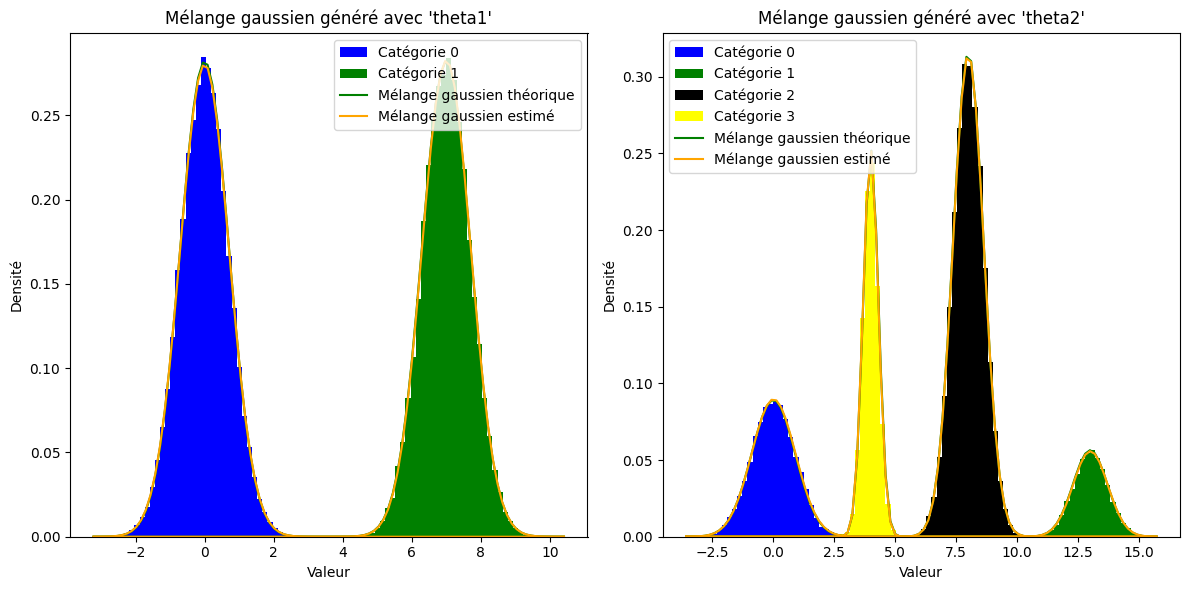

In [ ]:
# Structure de l'affichage
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Génération des données pour theta1 et theta2
n = 100000                        # Nombre d'observations
x1, z1 = generation(theta1, n)
x2, z2 = generation(theta2, n)

# Affichage de des histogrammes coloriés selon la variable latente
histogramme_groupe(ax1, len(theta1[0]), z1, x1)
histogramme_groupe(ax2, len(theta2[0]), z2, x2)

# Estimations
K1 = len(theta1[0])
esti_theta1 = emv(x1, z1, K1)
K2 = len(theta2[0])
esti_theta2 = emv(x2, z2, K2)

# Tracés des gaussiennes
tracer_gaussienne_couleur(ax1, theta1, x1, "Mélange gaussien théorique", "green")
tracer_gaussienne_couleur(ax2, theta2, x2, "Mélange gaussien théorique", "green")
tracer_gaussienne_couleur(ax1, esti_theta1, x1, "Mélange gaussien estimé", "orange")
tracer_gaussienne_couleur(ax2, esti_theta2, x2, "Mélange gaussien estimé", "orange")

# Mise en page...
ax1.legend(loc="upper right")
ax1.set_title("Mélange gaussien généré avec 'theta1'")
ax1.set_xlabel('Valeur')
ax1.set_ylabel('Densité')
ax2.legend(loc="upper left")
ax2.set_title("Mélange gaussien généré avec 'theta2'")
ax2.set_xlabel('Valeur')
ax2.set_ylabel('Densité')

# ... et affichage des graphiques
plt.tight_layout()
plt.show()


On remarque que l'estimation est très proche du mélange gaussien théorique. En effet, les courbes oranges et vertes sont quasiment superposées.

### 3.3  Algorithme CEM

On peut maintenant combiner les deux étapes d’estimation des labels z et d’estimation du paramètre $θ$ afin de proposer un algorithme itératif pour le clustering des données. Plus précisément, on peut répéter les deux étapes suivantes en espérant qu’il y aura convergence des labels estimés au fil des calculs.
On alterne :

- **E-step** : Calculer le clustering $\hat{z}$ selon (19.1) en utilisant la valeur actuelle $\hat{θ}$ du paramètre.
- **M-step** : Mettre à jour l’estimateur $\hat{θ}$ du paramètre selon la formule trouvée en question T3 en utilisant le clustering $\hat{z}$ calculé au E-step précédent.

Cet algorithme nécessite une initialisation, soit de $\hat{θ}$, soit de $\hat{z}$. En alternant les deux étapes E-step et M-step suffisamment longtemps, on espère converger vers le “vrai” clustering, à savoir les vraies valeurs $z$ des variables latentes.

#### S4.
**[Coeur de l’algorithme CEM]**. Implémenter une première version de l’algorithme CEM qui contient le coeur de l’algorithme. Pour cela, écrire une fonction qui prend en argument un vecteur d’observations x et un paramètre initial $θ^{(0)}$. La fonction répète les deux étapes du CEM 100 fois et renvoie le clustering
$\hat{z}$ ainsi que l’estimateur $\hat{θ}$ calculé à la dernière itération. Tester la fonction sur des données simulées en initialisant avec la vraie valeur du paramètre $\theta$.

In [9]:
# Question S4
def CEM_heart(x, theta):
    K = len(theta[0])
    for i in range(100):      # comme suggéré on répétète 100 fois le processus
        # E-step avec le calcul du clustering de z
        z = map_clustering(theta, x, K)
        # M-step qui met à jour l'estimateur de theta
        theta = emv(x, z, K)
    return z, theta

Et maintenant, testons notre code. On va générer des observations $x$ ainsi que leurs variables latentes associées $z$ à l'aide de la fonction 'generation' de la question S1. Dans un second temps, on essaye d'estimer $z$ et theta à partir des observations $x$. Pour cela on utilise CEM_heart et on initialise theta avec la vraie valeur du paramètre. On compare alors le theta initial et le theta estimé, les variables latentes initiales et estimées et on affiche graphiquement cela pour que cela soit plus visuel.

In [10]:
def test_CEM_heart(theta):
  x, z  = generation(theta, 1000)
  esti_z, esti_theta = CEM_heart(x, theta)

  # On affiche nos résultats
  print("\nTheta : ", theta)
  print("Estimation de theta : ", esti_theta)

  # On compare z et esti_z en comptant le nombre de z mal estimé
  S=0
  for i in range(len(z)):
    if z[i]!=esti_z[i]:
      S+=1
  print("\n Pourcentage de mauvaises estimations de z : ", S*100/len(z), " %\n")

  # On compare en utilisant une table de contingence
  table_de_contingence = pd.crosstab(z, esti_z, rownames=['Vraies valeurs'], colnames=['Estimations'])
  print(table_de_contingence)

  # Structure de l'affichage
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

  # Affichage des histogrammes coloriés selon la variable latente
  histogramme_groupe(ax1, len(theta[0]), z, x)    # theorique
  histogramme_groupe(ax2, len(theta[0]), esti_z, x) # estimé

  tracer_gaussienne_couleur(ax1, theta, x, "Mélange gaussien théorique", "green")
  tracer_gaussienne_couleur(ax2, esti_theta, x, "Mélange gaussien estimé", "orange")

  # Mise en page...
  ax1.legend(loc="upper right")
  ax1.set_title("Mélange gaussien généré avec 'theta1'")
  ax1.set_xlabel('Valeur')
  ax1.set_ylabel('Densité')
  ax2.legend(loc="upper right")
  ax2.set_title("Mélange gaussien estimé avec CEM_heart")
  ax2.set_xlabel('Valeur')
  ax2.set_ylabel('Densité')

  # ... et affichage des graphiques
  plt.tight_layout()
  plt.show()


Premier test :


Theta :  [[0.5, 0.5], [0, 7], [0.5, 0.5]]
Estimation de theta :  [[0.496, 0.504], [0.022665624830731024, 6.980285441780549], [0.5089613993109857, 0.5225683196850318]]

 Pourcentage de mauvaises estimations de z :  0.0  %

Estimations       0    1
Vraies valeurs          
0               496    0
1                 0  504


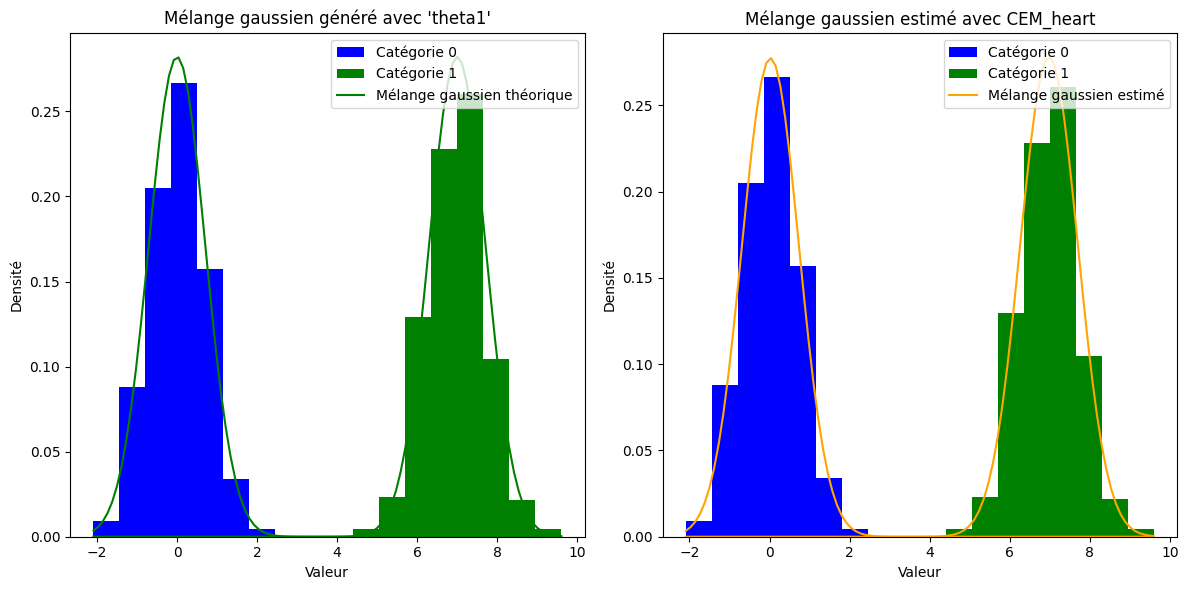

In [ ]:
theta = [[0.5, 0.5], [0, 7], [0.5, 0.5]]
test_CEM_heart(theta)

Deuxième test avec un theta différent :


Theta :  [[0.4, 0.2, 0.3, 0.1], [0, 7, 14, 21], [0.5, 0.5, 0.4, 0.2]]
Estimation de theta :  [[0.388, 0.206, 0.324, 0.082], [0.003915465021951944, 7.045284756945984, 13.98312186764747, 21.018035389929025], [0.4661675498899061, 0.5158396589588471, 0.3701207150839355, 0.16753427989598696]]

 Pourcentage de mauvaises estimations de z :  0.0  %

Estimations       0    1    2   3
Vraies valeurs                   
0               388    0    0   0
1                 0  206    0   0
2                 0    0  324   0
3                 0    0    0  82


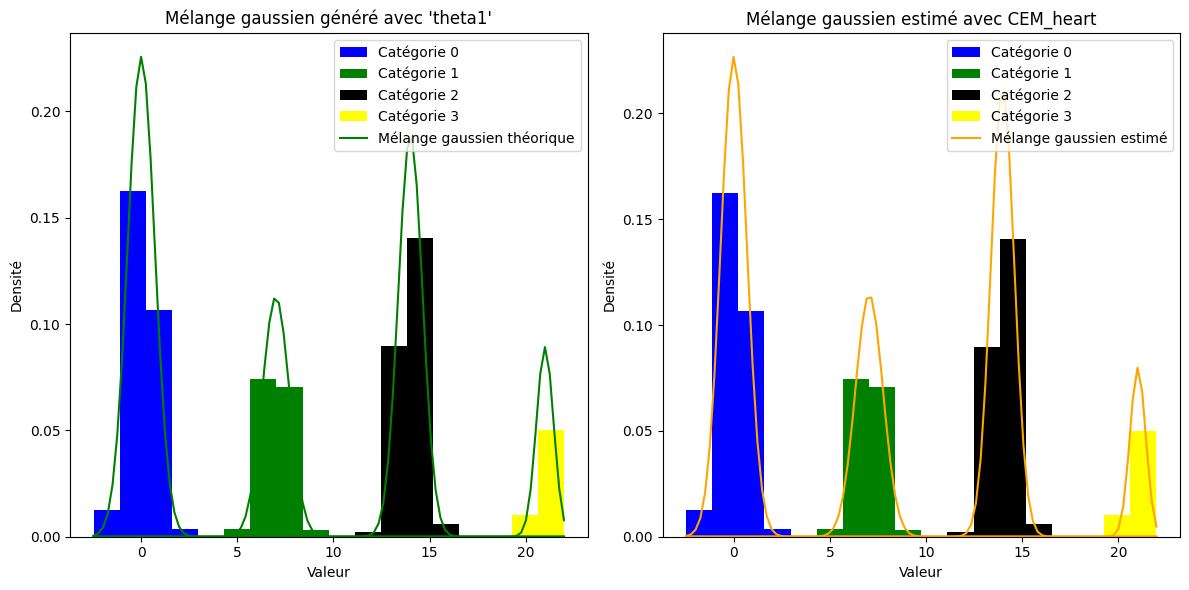

In [ ]:
theta = [[0.4, 0.2, 0.3, 0.1], [0, 7, 14, 21], [0.5, 0.5, 0.4, 0.2]]
test_CEM_heart(theta)

Troisième test avec un theta moins facilement "séparable" :


Theta :  [[0.8, 0.2], [0, 4], [1, 2]]
Estimation de theta :  [[0.828, 0.172], [0.0815649601588206, 4.358115356942641], [1.1441428385549768, 1.177045574836589]]

 Pourcentage de mauvaises estimations de z :  4.0  %

Estimations       0    1
Vraies valeurs          
0               790    2
1                38  170


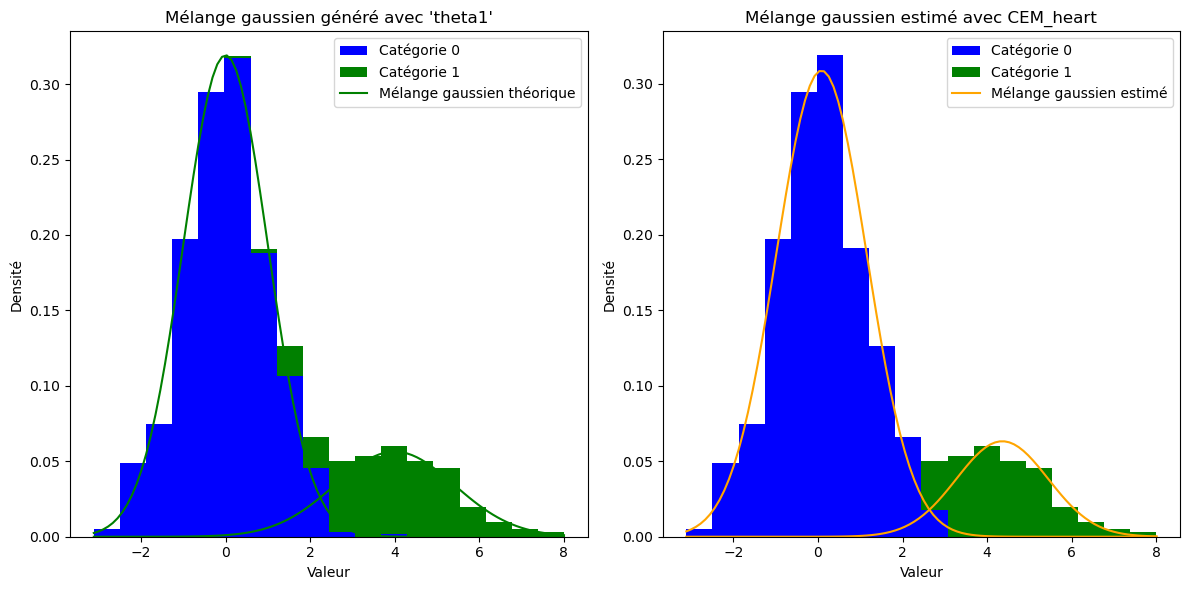

In [11]:
theta = [[0.8, 0.2], [0, 4], [1, 2]]
test_CEM_heart(theta)

Dans les trois tests, les résultats de CEM_heart semblent très proche du modèle recherché. L'algorithme fonctionne bien.

On s'intèresse maintenant à l'algorithme CEM dans sa globalité :

**Initialisation** : Pour une initialisation automatique de l’algorithme CEM on peut choisir au hasard K observations parmi les observations $x_1,\cdots, x_n$ pour les moyennes $\mu_k$ des gaussiennes, et toutes les
variances $\sigma_k ^2$ égales à la variance empiriques des données $x$. Les proportions $\pi_k$ prennent la valeur initiale 1/K.

**Plusieurs runs de l’algorithme** : On peut facilement vérifier que le résultat de l’algorithme CEM dépend beaucoup de la valeur initiale de $\theta$. Il est alors courant de l’exécuter plusieurs fois avec des points initiaux différents (en particulier avec des moyennes initiales $\mu_k$ différentes). Il faudra alors un critère pour comparer les différentes solutions et en choisir la meilleure. Nous pouvons retenir la solution dont la log-vraisemblance $l(θ)$ est maximale.

**Critère d’arrêt** : Enfin, au lieu de fixer le nombre d’itérations d’avance, il est plus approprié d’utiliser un critère d’arrêt pour juger du moment où l’algorithme a convergé. Ici, il paraît évident d’utiliser le critère selon lequel on arrête les calculs dès que le clustering $\hat{z}$ est identique d’une itération à l’autre.
Néanmoins, il est important de s’assurer que l’algorithme ne tourne pas indéfiniment. On garde alors un nombre maximal d’itérations à ne pas dépasser, même si le critère d’arrêt n’est pas vérifié.

#### S5.
**[Algorithme CEM]**. Modifier votre algorithme CEM en ajoutant les trois points discutés ci-dessus.

On définit la fonction 'l_theta' qu permettra dans 'CEM' de retenir la solution de log-vraisemblance maximale.

In [12]:
def l_theta(x,z,theta):
  somme = 0
  for i in range(len(x)):
    somme += sps.norm.pdf(x[i], theta[1][z[i]], np.sqrt(theta[2][z[i]]))*theta[0][z[i]]
  return somme

On enlève la boucle de répétition de 100 fois de CEM_heart pour gérer directement au sein de CEM, le nombre de boucles nécessaires.

In [13]:
def CEM_heart2(x, theta):
    K = len(theta[0])
    # E-step avec le calcul du clustering de z
    z = map_clustering(theta, x, K)
    # M-step qui met à jour l'estimateur de theta
    theta = emv(x, z, K)
    return z, theta

On peut alors s'intéresser à l'écriture de 'CEM' :

In [14]:
def CEM(x, K):
  lthetamaxi=-np.inf
  zmax = 0
  thetamax = 0

  # On execute l'algorithme 10 fois avec des points initiaux différents
  for j in range(10):
      # Initialisation de theta
      m = np.random.choice(x, size=K, replace=False)
      sigma = [np.var(x) for i in range(K)]
      pi = [1/K for i in range(K)]
      theta = [list(pi), list(m), list(sigma)]

      # Coeur de l'algorithme
      z_precedent = [0 for i in range(len(x))]
      z = map_clustering(theta, x, K)
      nb_iterations = 0
      while(z != z_precedent and nb_iterations<50):
        z_precedent = z
        z, theta = CEM_heart2(x, theta)
        nb_iterations += 1

      # Si les nouvelles estimations de z et theta sont meilleures au sens de la maximisation de la log-vraisemblance on les garde
      if(l_theta(x,z,theta)>lthetamaxi):
        lthetamaxi = l_theta(x,z,theta)
        zmax = z
        thetamax = theta

  return zmax, thetamax

#### S6.
**[Simulation avec CEM]**. Tester l’algorithme CEM sur des données simulées. Comparer le clustering obtenu par l’algorithme aux vraies valeurs des variables latentes par la table de contingence.
Comparer également l’estimateur $\hat{\theta}$ au vrai paramètre $\theta$. Commenter les résultats.

In [18]:
def testCEM(theta):
    K = len(theta[0])
    x, z = generation(theta, 1000)
    nb_bins = 2 * int(1000**(1/3))
    esti_z, esti_theta = CEM(x, K)

    # On affiche nos résultats
    print("\nTheta : ", theta1)
    print("Estimation de theta : ", esti_theta)

    # Comparaison en utilisant une table de contingence
    table_de_contingence = pd.crosstab(z, esti_z, rownames=['Vraies valeurs'], colnames=['Estimations'])
    print("\nTable de Contingence : \n")
    print(table_de_contingence)

    # Structure de l'affichage
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Affichage des histogrammes coloriés selon la variable latente
    histogramme_groupe(ax1, len(theta[0]), z, x)    # theorique
    histogramme_groupe(ax2, len(theta[0]), esti_z, x) # estimé

    tracer_gaussienne_couleur(ax1, theta, x, "Mélange gaussien théorique", "green")
    tracer_gaussienne_couleur(ax2, esti_theta, x, "Mélange gaussien estimé", "orange")

    # Mise en page...
    ax1.legend(loc="upper right")
    ax1.set_title("Mélange gaussien généré avec 'theta1'")
    ax1.set_xlabel('Valeur')
    ax1.set_ylabel('Densité')
    ax2.legend(loc="upper right")
    ax2.set_title("Mélange gaussien estimé avec CEM_heart")
    ax2.set_xlabel('Valeur')
    ax2.set_ylabel('Densité')

    # ... et affichage des graphiques
    plt.tight_layout()
    plt.show()

Premier test :


Theta :  [[0.5, 0.5], [0, 7], [0.5, 0.5]]
Estimation de theta :  [[0.4902, 0.5098], [-0.011158904988153667, 7.015203039728574], [0.4829042871309514, 0.5108487484925502]]

Table de Contingence : 

Estimations        0     1
Vraies valeurs            
0               4902     0
1                  0  5098


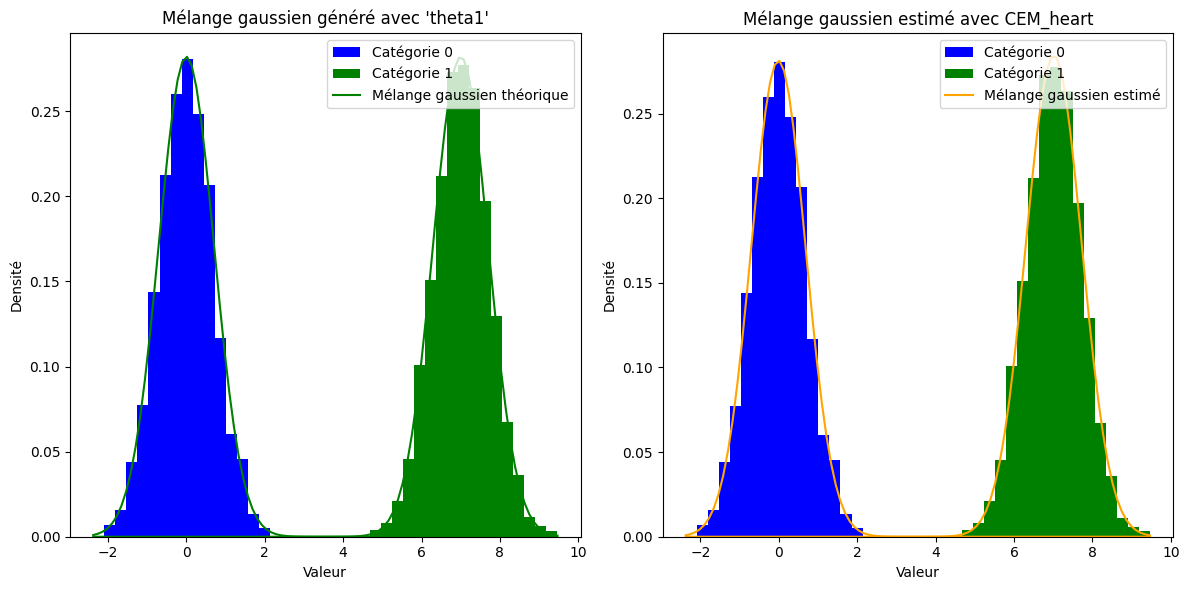

In [ ]:
theta = [[0.5, 0.5], [0, 7], [0.5, 0.5]]
testCEM(theta)

Deuxième test :


Theta :  [[0.5, 0.5], [0, 7], [0.5, 0.5]]
Estimation de theta :  [[0.109, 0.382, 0.303, 0.206], [20.945647511918395, -0.017063106089248027, 14.038743451163405, 6.982418033059611], [0.18386682167905194, 0.49872708011535394, 0.40882614870889855, 0.49941252109771017]]

Table de Contingence : 

Estimations       0    1    2    3
Vraies valeurs                    
0                 0  382    0    0
1                 0    0    0  206
2                 0    0  303    0
3               109    0    0    0


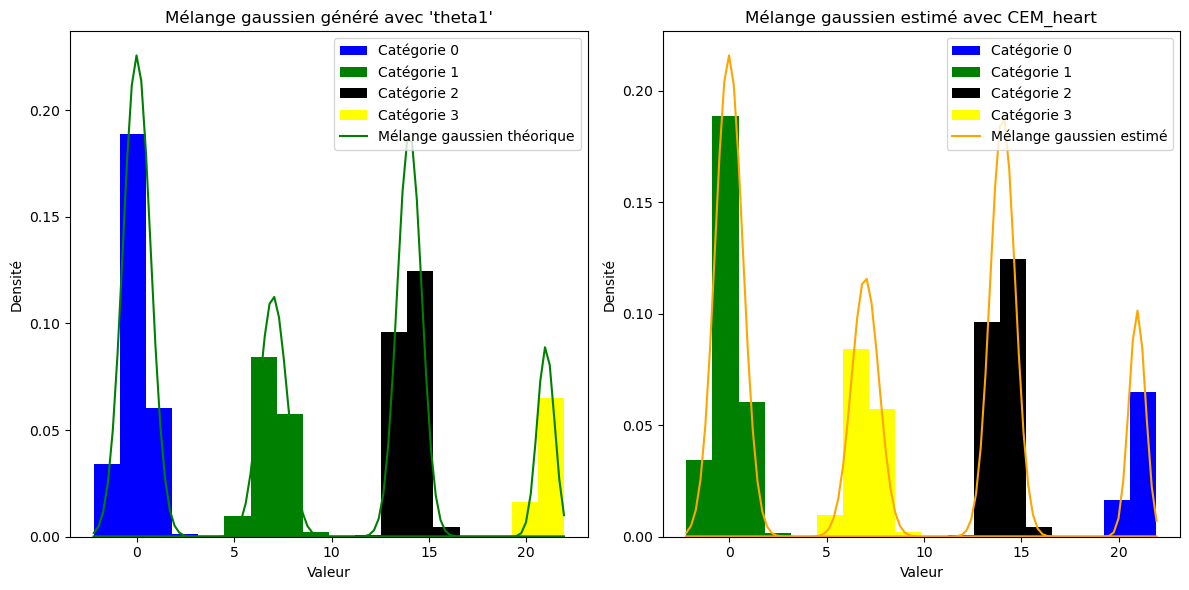

In [38]:
theta = [[0.4, 0.2, 0.3, 0.1], [0, 7, 14, 21], [0.5, 0.5, 0.4, 0.2]]
testCEM(theta)

Troisième test :


Theta :  [[0.5, 0.5], [0, 7], [0.5, 0.5]]
Estimation de theta :  [[0.816, 0.184], [-0.014548749036583446, 4.21342410725304], [0.9661877584462399, 1.5594318856120213]]

Table de Contingence : 

Estimations       0    1
Vraies valeurs          
0               786    7
1                30  177


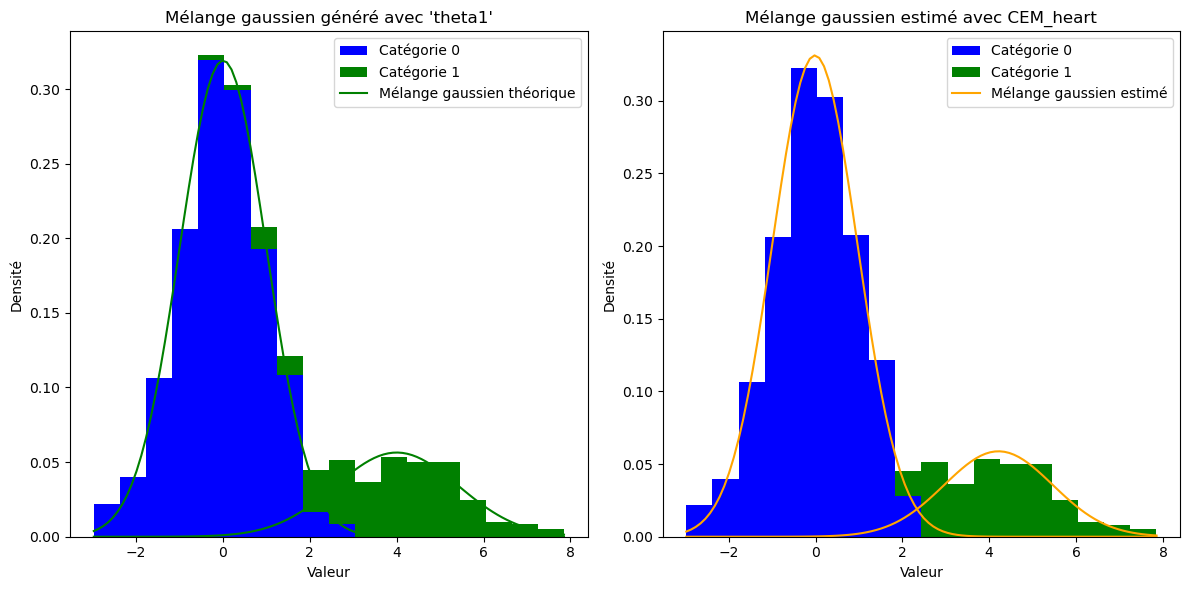

In [28]:
theta = [[0.8, 0.2], [0, 4], [1, 2]]
testCEM(theta)

# 4. Application sur des données

#### S7.
**[Données geyser]**. Le fichier faithful.csv disponible à l’adresse
https://perso.lpsm.paris/~rebafka/faithful.csv
contient les données sur le geyser Old Faithful. Il contient deux colonnes, les données sur les durées d’éruption représentées en la Figure 19.1 a) et la durée d’attente depuis l’éruption précédente. Appliquer l’algorithme CEM pour fitter un mélange gaussien avec deux composantes à chacune des variables.
Superposer la densité avec les paramètres estimés à l’histogramme et commenter le résultat. Obtient-on le même clustering avec les deux variables?

On commence par charger les données et à les afficher.

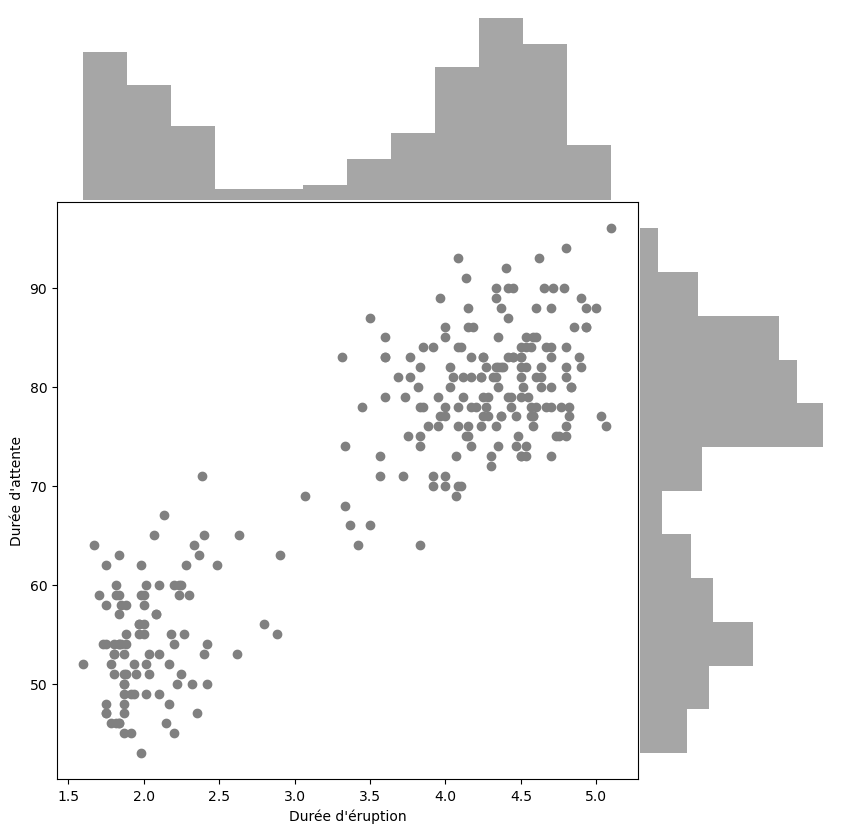

In [39]:
from matplotlib.gridspec import GridSpec

# Chargement des données
df = pd.read_csv('https://perso.lpsm.paris/~rebafka/faithful.csv')

# Configuration de la grille pour les sous-graphes
fig = plt.figure(figsize=(10, 10))
grille = GridSpec(4, 4, figure=fig)

# On trace 'waiting' en y et 'eruptions' en x
nuage_de_points = fig.add_subplot(grille[1:4, 0:3])
nuage_de_points.scatter(df['eruptions'], df['waiting'], color="gray")
nuage_de_points.set_xlabel('Durée d\'éruption')
nuage_de_points.set_ylabel('Durée d\'attente')

# Histogramme de la variable 'eruptions' en haut
x_hist_ax = fig.add_subplot(grille[0, 0:3], sharex=nuage_de_points)
nb_bins_x = 2 * int(len(df['eruptions'])**(1./3.))
x_hist_ax.hist(df['eruptions'], bins=nb_bins_x, color='gray', alpha=0.7)
x_hist_ax.axis('off')

# Histogramme de la variable 'waiting' à droites
y_hist_ax = fig.add_subplot(grille[1:4, 3], sharey=nuage_de_points)
nb_bins_y = 2 * int(len(df['waiting'])**(1./3.))
y_hist_ax.hist(df['waiting'], bins=nb_bins_y, orientation='horizontal', color='gray', alpha=0.7)
y_hist_ax.axis('off')

# Ajustement de l'espace entre les sous-graphiques
plt.subplots_adjust(hspace=0.01, wspace=0.01)

# Affichage de la figure
plt.show()

Puis on lance l'algorithme CEM avec un choix de deux clusters sur ces observations.

In [ ]:
# Pour les durées d'éruption
esti_z, esti_theta = CEM(df['eruptions'], 2)
print(esti_theta)

# Pour les durées d'attente
esti_z2, esti_theta2 = CEM(df['waiting'], 2)
print(esti_theta2)

[[0.6470588235294118, 0.35294117647058826], [4.283397727272728, 2.0291562499999998], [0.17781679635847106, 0.06339894433593753]]
[[0.6213235294117647, 0.3786764705882353], [80.49112426035504, 55.15533980582524], [29.599033647281253, 38.88849090394949]]


Pour vérifier nos résultats, on superpose aux histogramme de données les gaussiennes estimées.

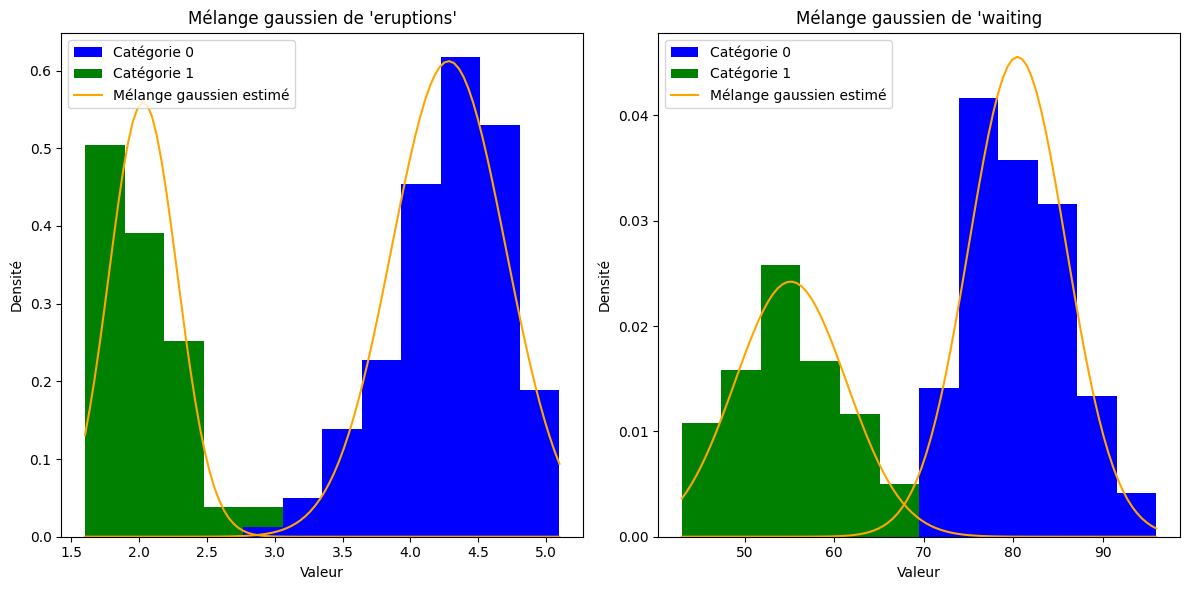

In [ ]:
def S7(nbclusters):
    # Structure de l'affichage
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Affichage de des histogrammes coloriés selon la variable latente
    histogramme_groupe(ax1, nbclusters, esti_z, df['eruptions'])
    histogramme_groupe(ax2, nbclusters, esti_z2, df['waiting'])

    tracer_gaussienne_couleur(ax1, esti_theta, df['eruptions'], "Mélange gaussien estimé", "orange")
    tracer_gaussienne_couleur(ax2, esti_theta2, df['waiting'], "Mélange gaussien estimé", "orange")

    # Mise en page...
    ax1.legend(loc="upper left")
    ax1.set_title("Mélange gaussien de 'eruptions'")
    ax1.set_xlabel('Valeur')
    ax1.set_ylabel('Densité')
    ax2.legend(loc="upper left")
    ax2.set_title("Mélange gaussien de 'waiting")
    ax2.set_xlabel('Valeur')
    ax2.set_ylabel('Densité')

    # ... et affichage des graphiques
    plt.tight_layout()
    plt.show()

# On lance le programme dans le cas d'un nombre de clusters de deux
S7(2)

On peut alors essayer de combiner les deux graphiques pour visuellement distinguer les deux clusters dans le plan. On choisit d'afficher les points dans la même couleur que celle qui représente la variable latente dans les histogrammes ci-dessus. Dans le cas où la variable latente estimée pour 'eruptions' est différente de la variable latente estimée pour 'waiting' on affiche le point en jaune de sorte à bien le distinguer.

In [40]:
def histogramme_groupe2(ax, nb_cluster, z, x, orientation):
  colors = ['blue', 'green', 'black', 'yellow', 'magenta', 'gray']
  nb_bins = 2 * int(len(x)**(1./3.))
  data = [[] for i in range(nb_cluster)]

  # Partionnement des points selon leur variables latentes
  for i in range(len(z)):
    for j in range(nb_cluster):
      if z[i] == j:
        data[j].append(x[i])

  ax.hist(data, bins=nb_bins, density=True, color=colors[:nb_cluster], stacked=True, orientation = orientation, label=["Catégorie "+str(i) for i in range(nb_cluster)])

Pour mieux visualiser les clusters, nous avons eu l'idée de tracer une ellispse autour de chaque cluster détecté. Pour faire cela, on utilise la fonction 'confidence_ellipse' de la documentation de Matplotlib ([ici](https://matplotlib.org/stable/gallery/statistics/confidence_ellipse.html)) que l'on a réécrite ci-dessous :

In [ ]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=2.8, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The Axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

On obtient alors ceci :

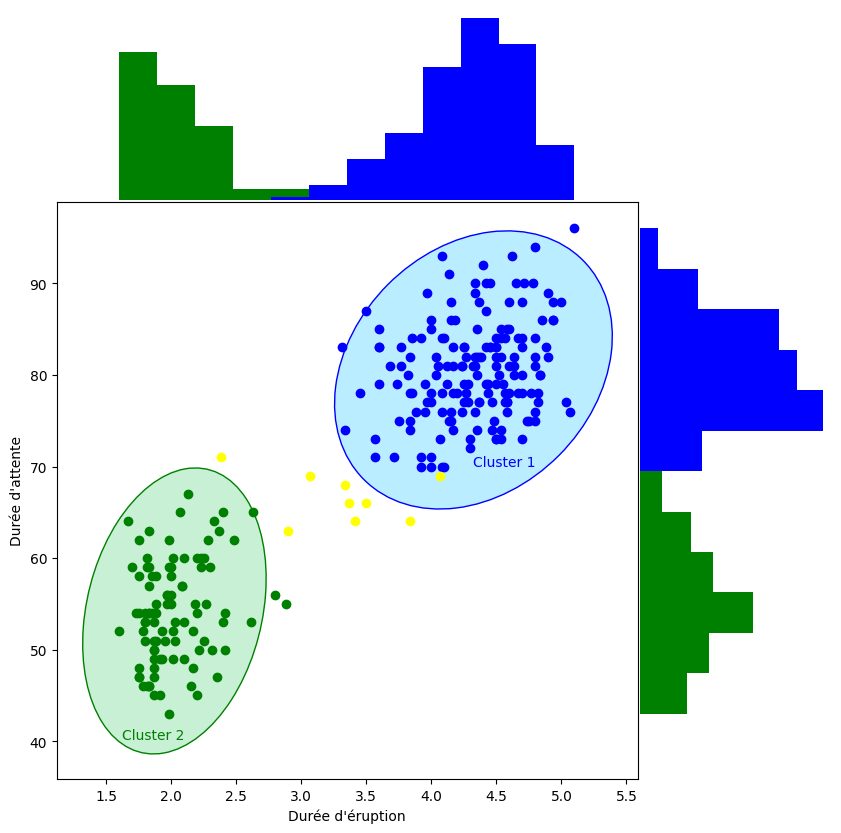

In [ ]:
# Configuration de la grille pour les sous-graphes
fig = plt.figure(figsize=(10, 10))
grille = GridSpec(4, 4, figure=fig)

# Séparation des points selon leur variable latente
datax = [[] for i in range(3)]
datay = [[] for i in range(3)]
for i in range(len(df['eruptions'])):
    if esti_z[i] == 0 and esti_z2[i]==0:
      datax[0].append(df['eruptions'][i])
      datay[0].append(df['waiting'][i])
    if esti_z[i] == 1 and esti_z2[i]==1:
      datax[1].append(df['eruptions'][i])
      datay[1].append(df['waiting'][i])
    if esti_z[i] == 1 and esti_z2[i]==0:
      datax[2].append(df['eruptions'][i])
      datay[2].append(df['waiting'][i])
    if esti_z[i] == 0 and esti_z2[i]==1:
      datax[2].append(df['eruptions'][i])
      datay[2].append(df['waiting'][i])

# On trace les points...
nuage_de_points = fig.add_subplot(grille[1:4, 0:3])

# ... du premier cluster avec une ellipse de confiance...
nuage_de_points.scatter(datax[0], datay[0], color="blue")  # les points qui appartiennent au cluster 1
confidence_ellipse(datax[0], datay[0], nuage_de_points, edgecolor='blue', facecolor='#B9EDFF', zorder=0)
nuage_de_points.text(np.mean(datax[0]), np.mean(datay[0]) - 10.5, "Cluster 1", color="blue")

# ... et du deuxième cluster avec son ellipse de confiance
nuage_de_points.scatter(datax[1], datay[1], color="green") # les points qui appartiennent au cluster 2
confidence_ellipse(datax[1], datay[1], nuage_de_points, edgecolor='green', facecolor='#C8F0D5', zorder=0)
nuage_de_points.text(np.mean(datax[1])-0.4, np.mean(datay[1]) - 14, "Cluster 2", color="green")

# On trace les points "entre" les deux clusters
nuage_de_points.scatter(datax[2], datay[2], color="yellow")

# Titres des axes
nuage_de_points.set_xlabel('Durée d\'éruption')
nuage_de_points.set_ylabel('Durée d\'attente')

# Histogramme de la variable 'eruptions' en haut
x_hist_ax = fig.add_subplot(grille[0, 0:3], sharex=nuage_de_points)
nb_bins_x = 2 * int(len(df['eruptions'])**(1./3.))
histogramme_groupe2(x_hist_ax, 2, esti_z, df['eruptions'], 'vertical')
x_hist_ax.axis('off')

# Histogramme de la variable 'waiting' à droite
y_hist_ax = fig.add_subplot(grille[1:4, 3], sharey=nuage_de_points)
nb_bins_y = 2 * int(len(df['waiting'])**(1./3.))
histogramme_groupe2(y_hist_ax, 2, esti_z2, df['waiting'], 'horizontal')
y_hist_ax.axis('off')

# Ajuster l'espacement entre les sous-graphiques
plt.subplots_adjust(hspace=0.01, wspace=0.01)

# Afficher la figure
plt.show()

#### S8.
**[Choix du nombre de clusters K]** Explorer d’autres valeurs pour le nombre de composantes du modèle de mélange. Peut-on améliorer l’adéquation de la densité estimée à l’histogramme en choisissant plus de clusters ?

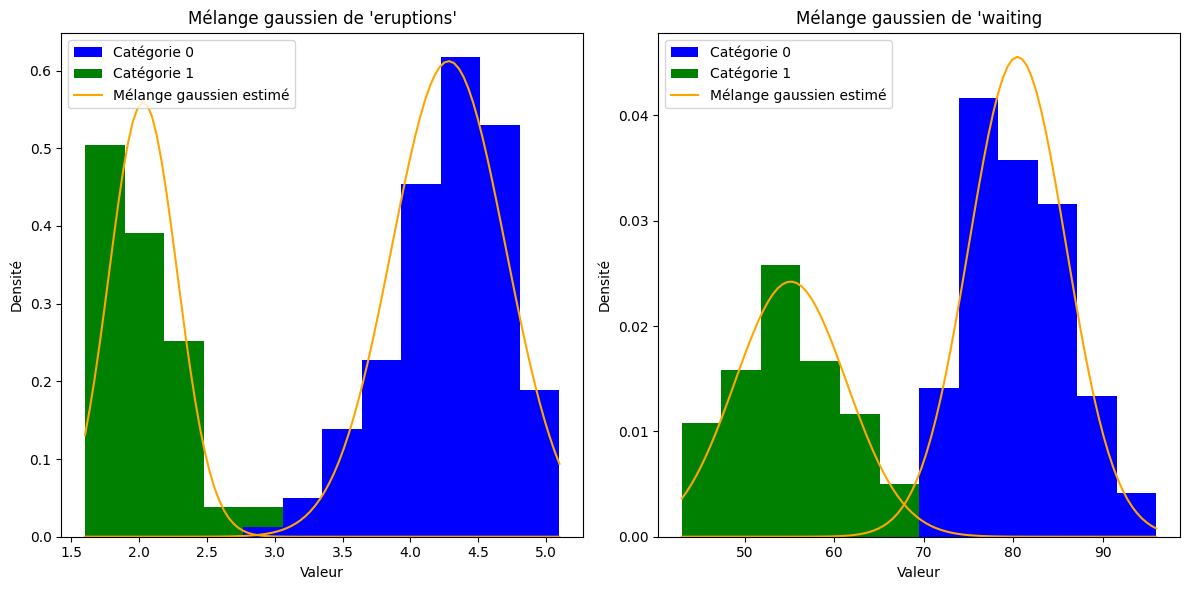

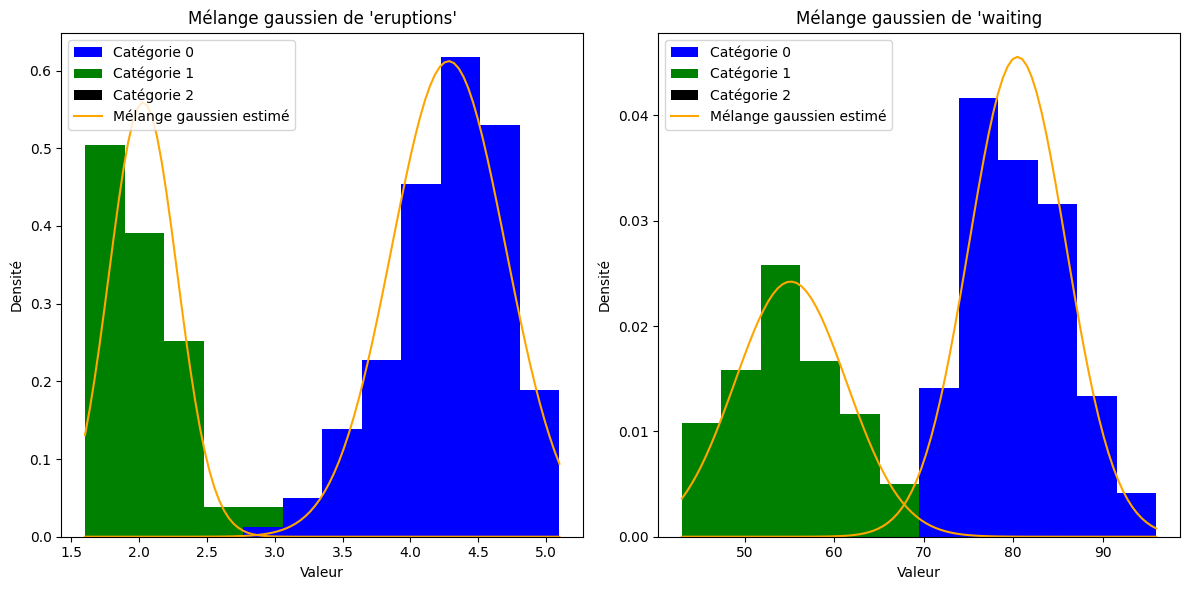

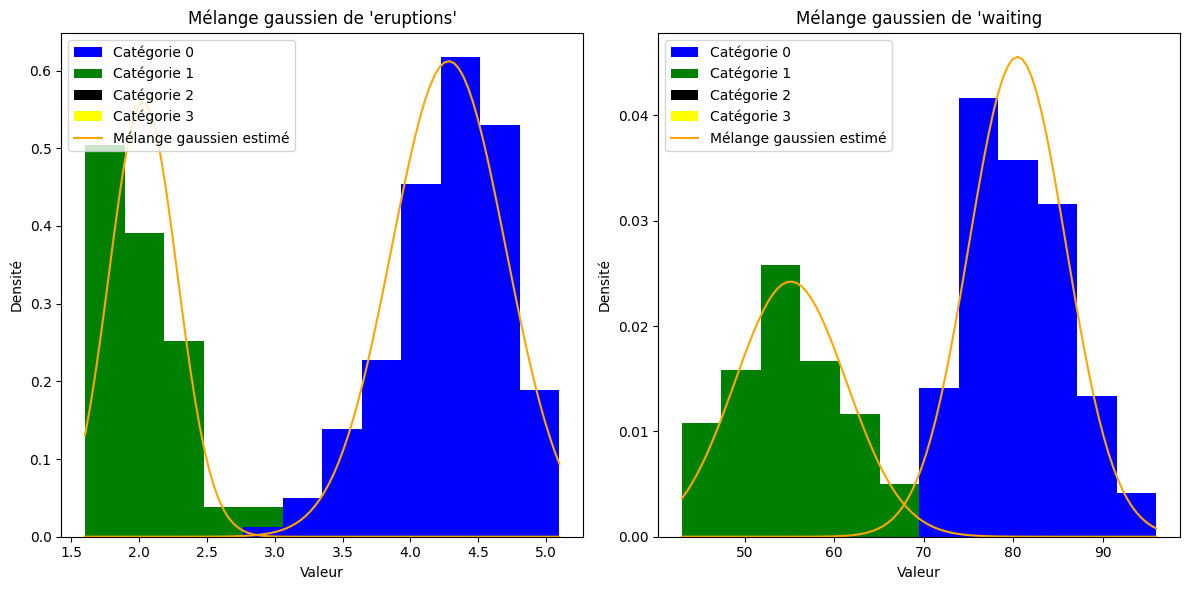

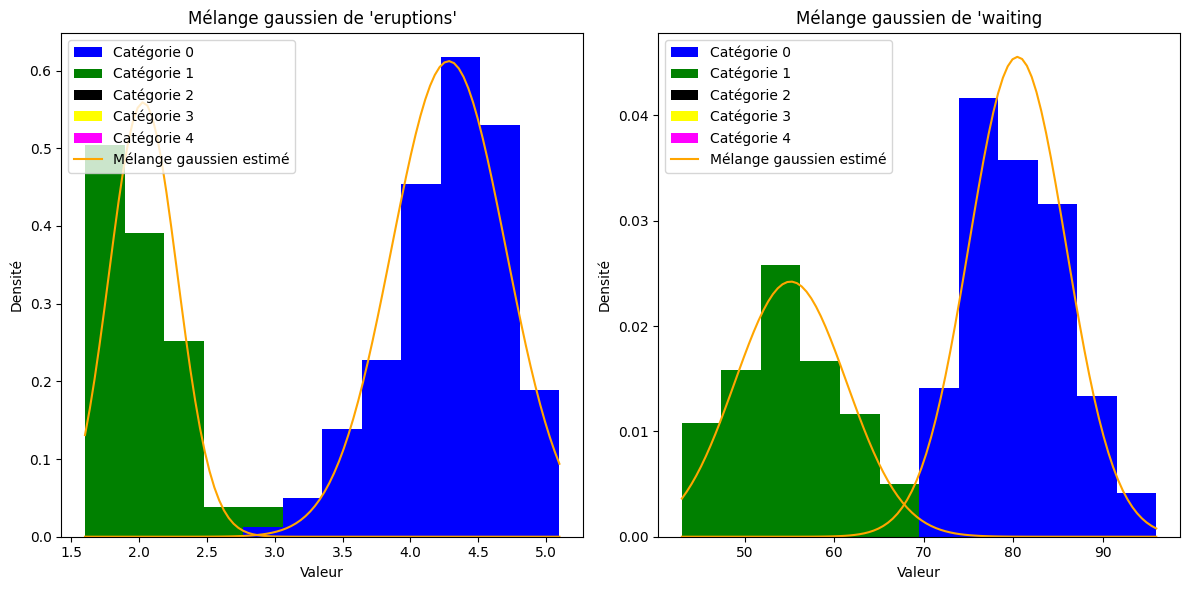

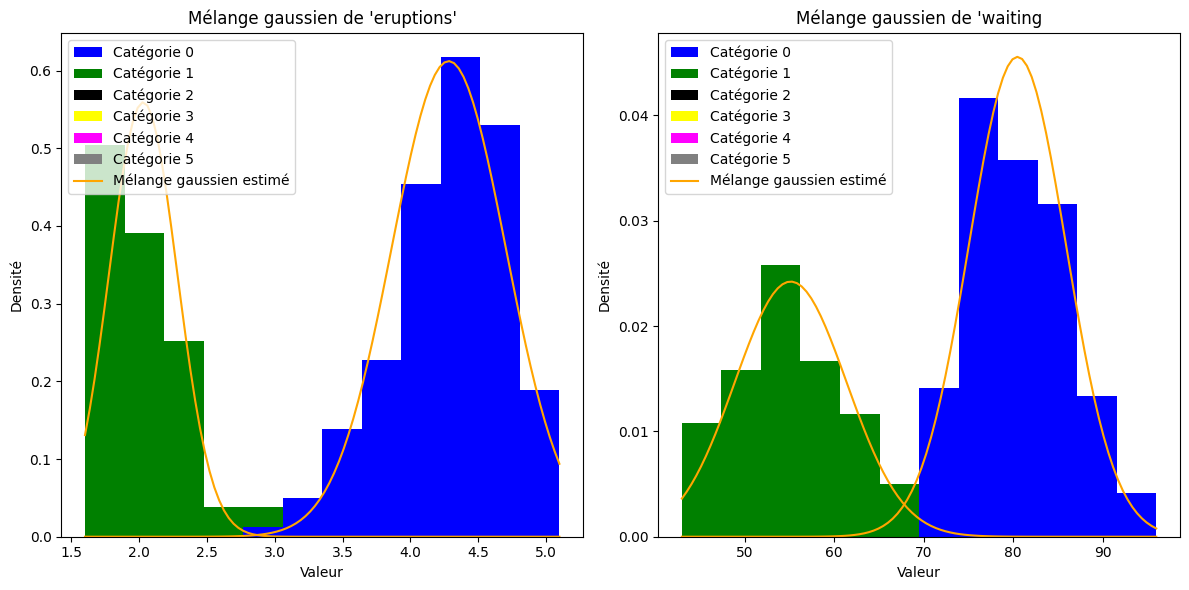

In [ ]:
for nbclusters in range(2, 7):
  S7(nbclusters)

L'augmentation du nombre de clusters ne semblent pas changer l’adéquation de la densité estimée à l’histogramme.

Le jeu de données sur la glande thyroïde contient **six variables**: Diagnosis est la classification en fonctionnement normal, hypothyroïdie ou hyperthyroïdie, les cinq autres RT3U, T4, T3, TSH, DTSH sont les différentes variables mesurées pendant le test. L’objectif final de l’étude est de développer une **méthode de prédiction** qui prédit la variable Diagnosis pour un nouveau patient lorsqu’on ne dispose que des résultats du test. Ici nous allons étudier si le clustering obtenu par un mélange gaussien correspond au clustering donné par la variable Diagnosis.

#### S9.
**[Données thyroïde: exploration des variables]** Importer les données du fichier thyroid.csv
disponible à l’adresse
https://perso.lpsm.paris/~rebafka/thyroid.csv.
Commencer par tracer l’histogramme de chaque variable. Observer que certains histogramme n’ont
pas du tout à l’allure d’un mélange gaussien. Dans ce cas, appliquer une transformation (par exemple
logarithmique) à la variable et jusqu’à obtenir un histogramme qui ressemble plus à un mélange
gaussien.

Nombre de patients Normal :  150  c'est à dire :  69.76744186046511  %
Nombre de patients Hyper :  35  c'est à dire :  16.27906976744186  %
Nombre de patients Hypo :  30  c'est à dire :  13.953488372093023  %


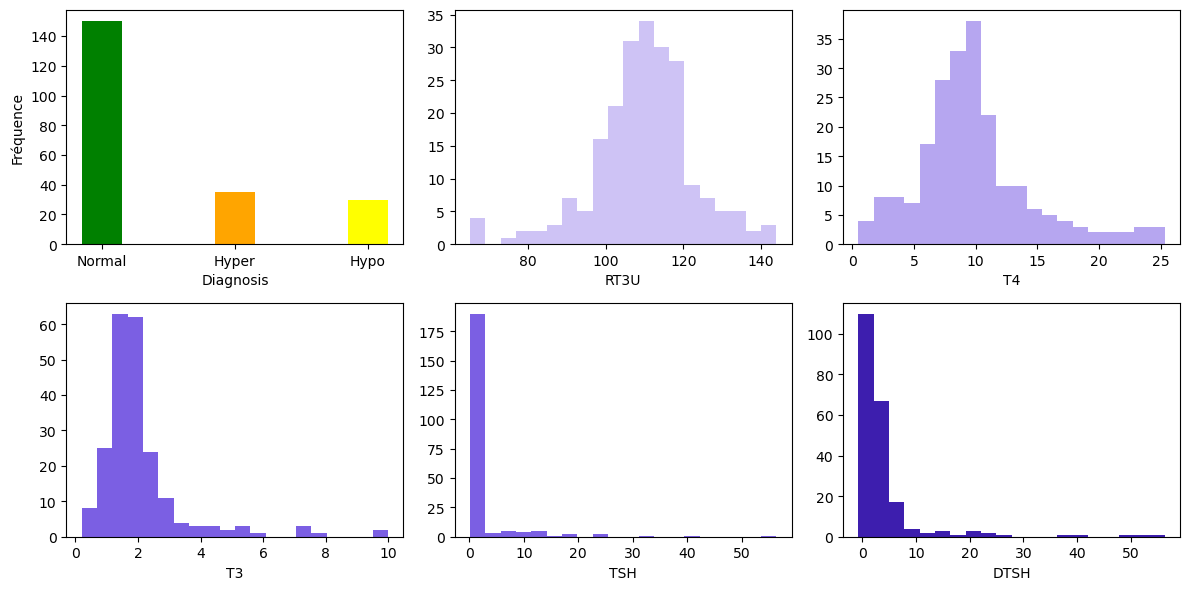

In [41]:
# URL du fichier CSV
url = 'https://perso.lpsm.paris/~rebafka/thyroid.csv'

# On importe les données dans un DataFrame pandas
df = pd.read_csv(url)

# On stocke les colonnes dans des listes
Diagnosis = df['Diagnosis']
RT3U = df['RT3U']
T4 = df['T4']
T3 = df['T3']
TSH = df['TSH']
DTSH = df['DTSH']
data = [Diagnosis, RT3U, T4, T3, TSH, DTSH]


def histogramme():
  plt.figure(figsize=(12, 6))

  # On trace d'abord la variable 'Diagnosis'
  plt.subplot(2, 3, 1)

  couleurs = ['green', 'orange', 'yellow'] #normal <-> vert , hyper <-> orange et hypo <-> jaune
  categories = ['Normal', 'Hyper', 'Hypo']
  frequences = [0, 0, 0]
  for elem in Diagnosis:
    if elem == 'Normal':
      frequences[0] += 1
    elif elem == 'Hyper':
      frequences[1] += 1
    else:
      frequences[2] += 1

  print("Nombre de patients Normal : ", frequences[0], " c'est à dire : ", frequences[0]/len(Diagnosis)*100," %")
  print("Nombre de patients Hyper : ", frequences[1], " c'est à dire : ", frequences[1]/len(Diagnosis)*100," %")
  print("Nombre de patients Hypo : ", frequences[2], " c'est à dire : ", frequences[2]/len(Diagnosis)*100," %")

  # On utilise plt.bar pour avoir une couleur par colonne
  plt.bar(categories, frequences, color=couleurs, width=0.3)
  plt.xlabel('Diagnosis')
  plt.ylabel('Fréquence')

  # On trace ensuite les autres variables
  couleur = ['#CEC3F5', '#B6A6F0', '#7B5FE3', '#7B5FE3', '#3D1EAE'] # dégradé de bleu
  for i in range(1,len(data)):
    plt.subplot(2, 3, i+1)
    plt.hist(data[i], bins=20, color=couleur[i-1])
    plt.xlabel(data[i].name)

  plt.tight_layout()
  plt.show()

histogramme()

On remarque que les histogrammes de TSH et DTSH n’ont pas du tout l’allure d’un mélange gaussien. Comme suggéré par l'énoncé, appliquons leur une transformation logarithmique.

Nombre de patients Normal :  150  c'est à dire :  69.76744186046511  %
Nombre de patients Hyper :  35  c'est à dire :  16.27906976744186  %
Nombre de patients Hypo :  30  c'est à dire :  13.953488372093023  %


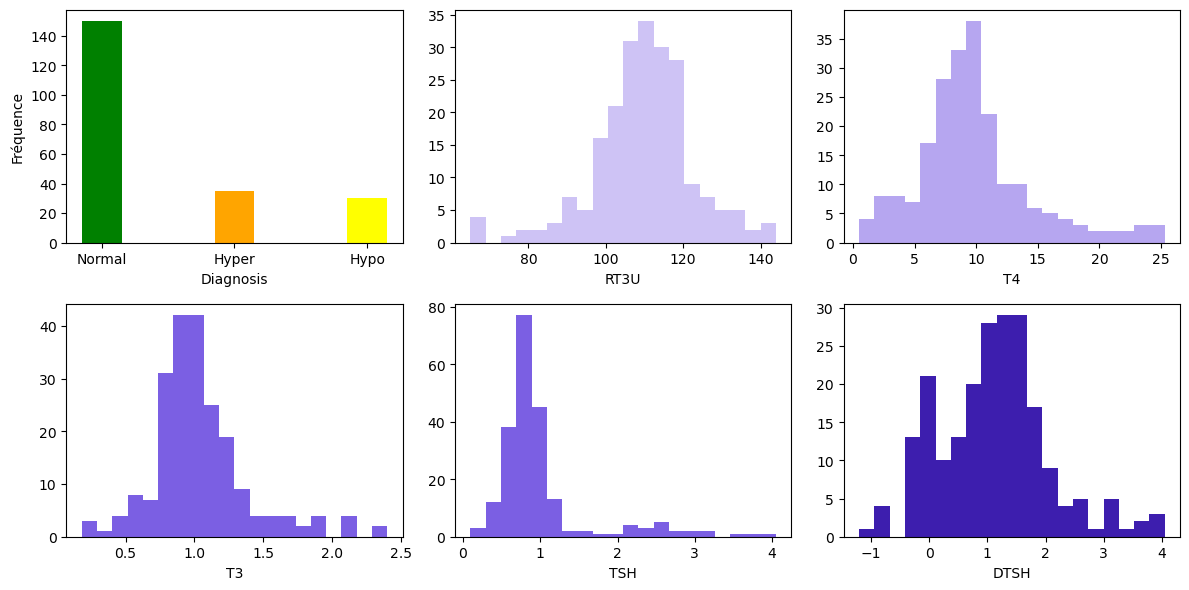

In [42]:
# Appliquer la transformation logarithmique, on doit nécessairement ajouter un epsilon (ici 1) pour rester dans le domaine de définition du log
TSH = np.log(TSH+1)
T3 = np.log(T3+1)
DTSH = np.log(DTSH+1)
data = [Diagnosis, RT3U, T4, T3, TSH, DTSH]

# Affichage des nouveaux histogrammes
histogramme()

On obtient alors des gaussiennes pour TSH et DTSH. On peut ainsi appliquer l'algorithme CEM aux différentes variables.

#### S10.
**[Données thyroïde: clustering]** Appliquer l’algorithme CEM aux différentes variables. Comparer le clustering obtenu à celui défini par la variable Diagnosis. Quelle variable est la plus appropriée pour prédire la variable Diagnosis ?

In [43]:
def histogramme_groupe3(ax, nb_cluster, z, x, nbbins):
  couleurs = ['green', 'orange', 'yellow']
  data = [[] for i in range(nb_cluster)]

  # Partionnement des points selon leur variable latente
  for i in range(len(z)):
    for j in range(nb_cluster):
      if z[i] == j:
        data[j].append(x[i])

  ax.hist(data, bins=nbbins, density=True, color=couleurs[:nb_cluster], stacked=True, label=['Normal', 'Hyper', 'Hypo'])

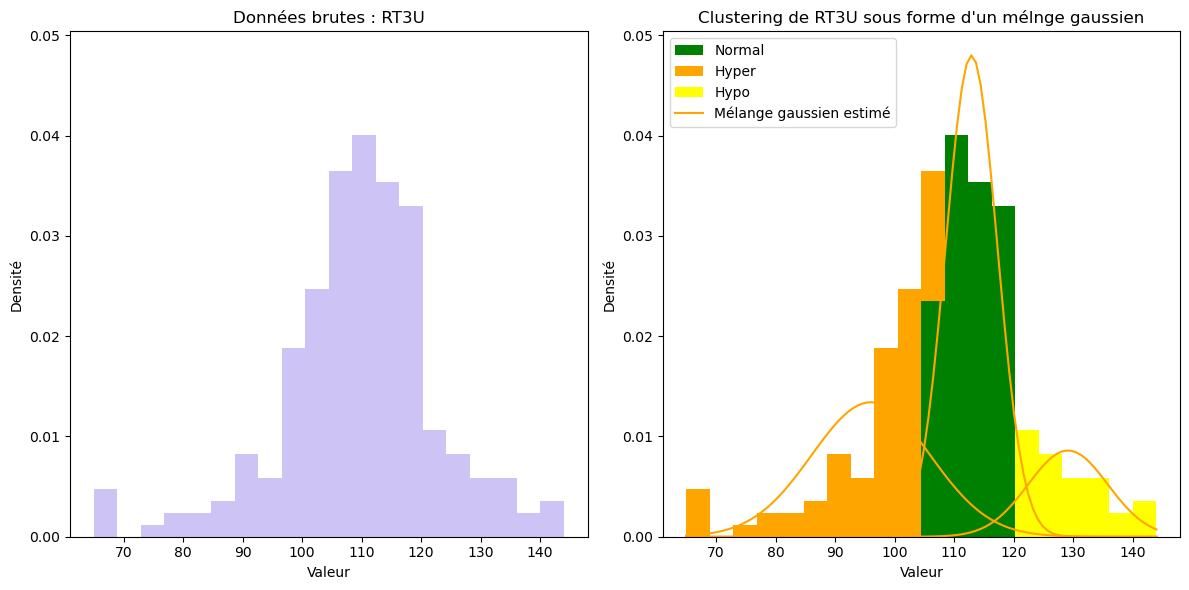

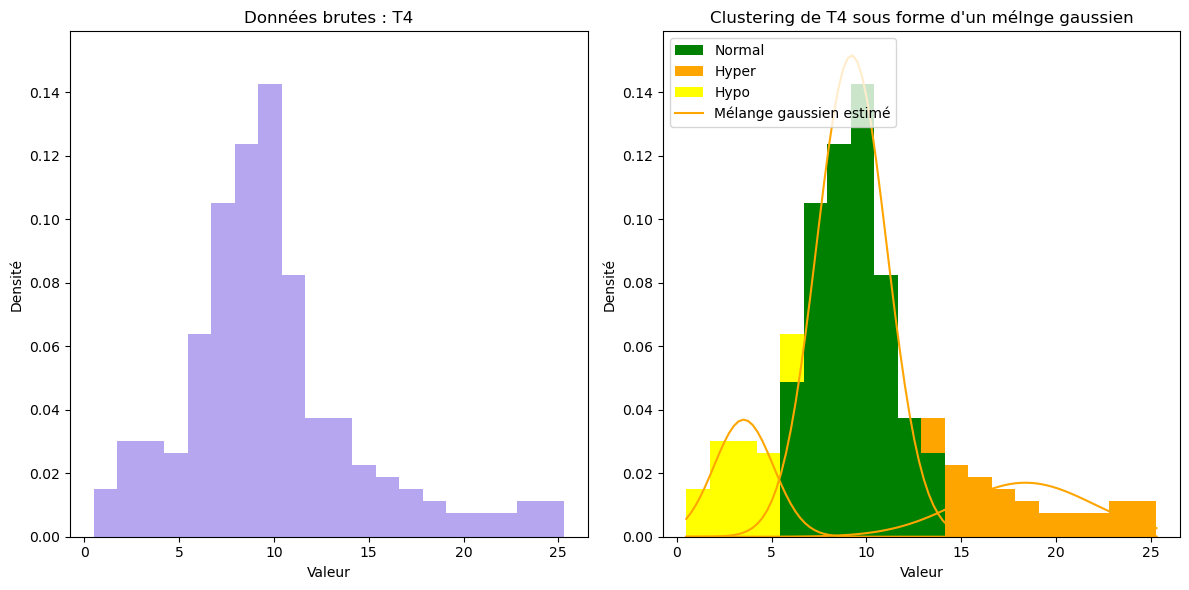

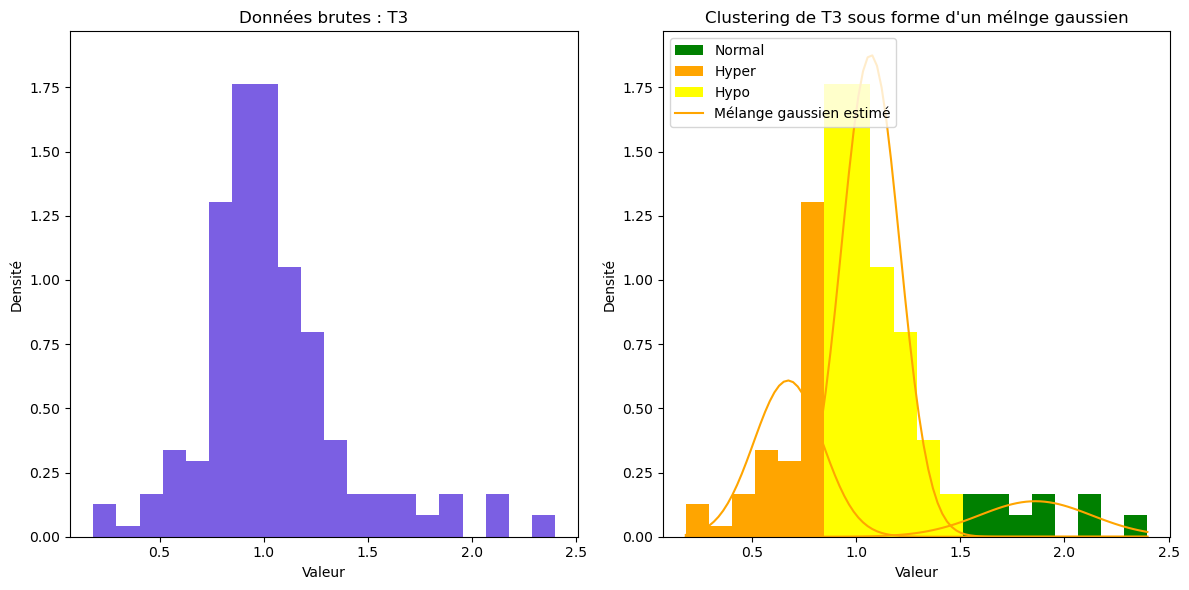

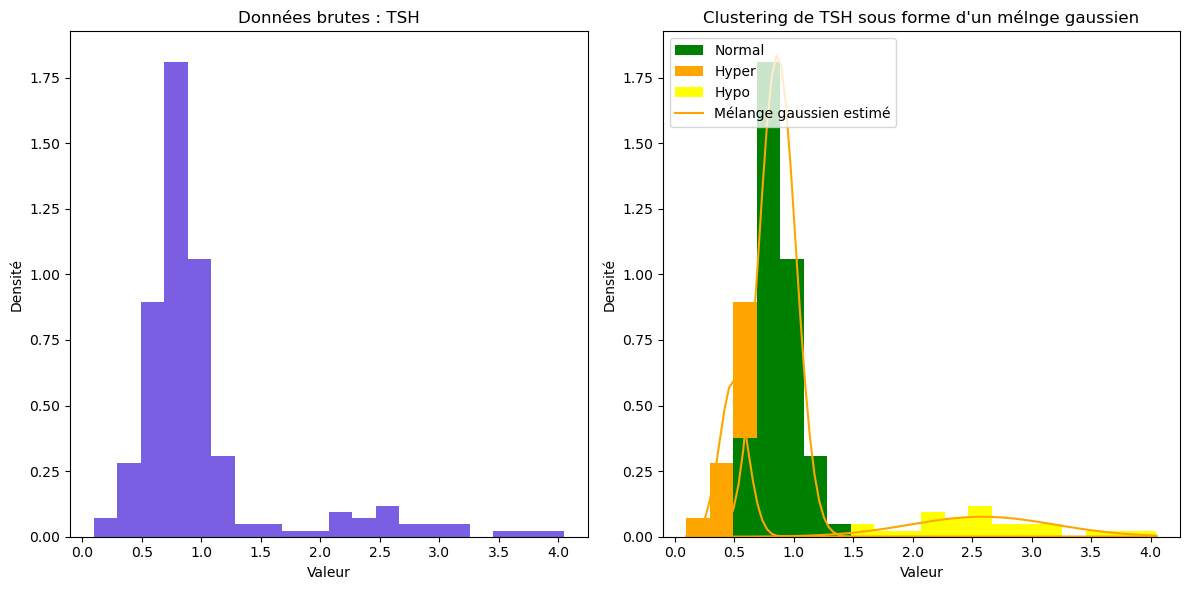

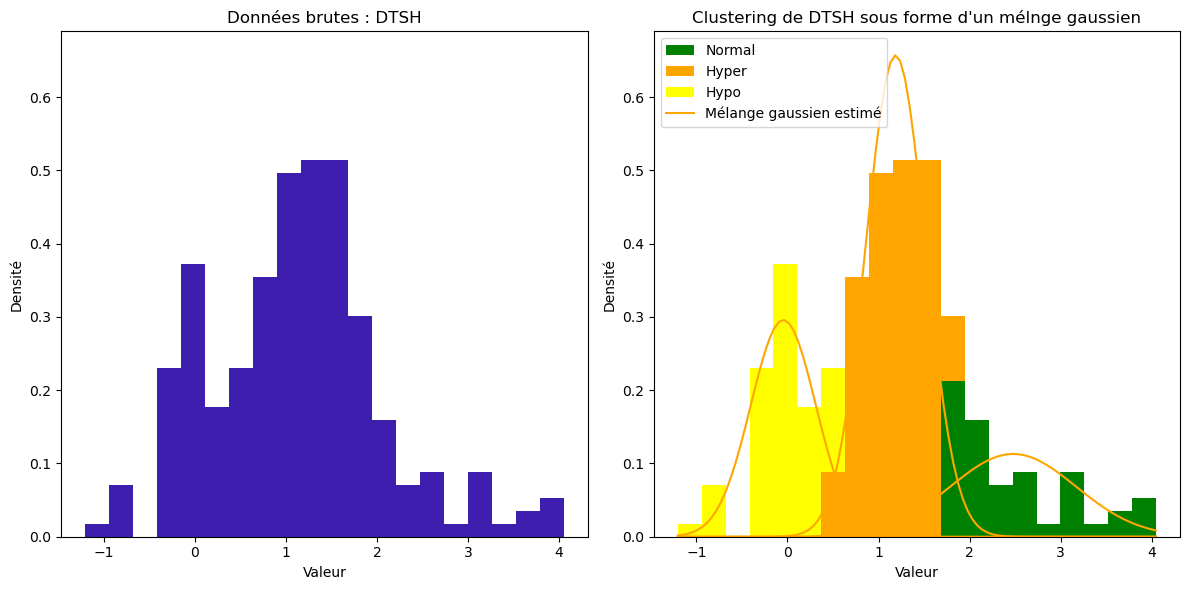

In [46]:
def S10(i):
  # Structure de l'affichage
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
  couleur = ['#CEC3F5', '#B6A6F0', '#7B5FE3', '#7B5FE3', '#3D1EAE'] # dégradé de bleu

  # Affichage des histogrammes coloriés selon la variable latente
  ax1.hist(data[i], bins=20, color=couleur[i-1], density=True)

  esti_z, esti_theta = CEM(data[i], 3)
  histogramme_groupe3(ax2, 3, esti_z, data[i], 20)
  tracer_gaussienne_couleur(ax2, esti_theta, data[i], "Mélange gaussien estimé", "orange")

  # Mise en page...
  ylim_droite = ax2.get_ylim()
  ax1.set_ylim(ylim_droite)
  ax1.set_title("Données brutes : "+data[i].name)
  ax1.set_xlabel('Valeur')
  ax1.set_ylabel('Densité')
  ax2.legend(loc="upper left")
  ax2.set_title("Clustering de "+data[i].name +" sous forme d'un mélnge gaussien")
  ax2.set_xlabel('Valeur')
  ax2.set_ylabel('Densité')

  # On ramène l'échelle verticale au même niveau pour les deux graphes car elle a été modifiée lorsqu'on a segmenté par groupe de couleur...
  ylim_droite = ax2.get_ylim()
  ax1.set_ylim(ylim_droite)

  # ... et affichage des graphiques
  plt.tight_layout()
  plt.show()

for i in range(1, len(data)):
  S10(i)

Il semble que la variable DTSH est la plus appropriée pour prédire la variable Diagnosis car dans ce cas, après application de l'algorithme CEM, les trois groupes sont bien distincts tout comme les gaussiennes qui estiment theta.

D’après l'énoncé, on peut espérer améliorer le clustering en analysant plusieurs variables simultanément. Autrement dit, au lieu d’utiliser une seule variable et appliquer un modèle de mélange de lois normales univariées, on pourrait considérer des lois normales multivariées à 2 dimensions ou plus. En effet, on peut facilement adapter l’**algorithme CEM au cas multivarié**. La structure de l’algorithme est identique et les formules des étapes E et M changent à peine.

#### S11.
**[Question facultative]**. Adapter l’algorithme CEM à des mélanges gaussien multivariés. Appliquer cet algorithme aux données sur la glande thyroïde. Etudier si le clustering obtenu est plus proche de celui de la variable Diagnosis.

Pour faire cela, on doit modifier la E-step, la M-step et le calcul de la vraisemblance qui intervient dans CEM. On a donc besoin de calculer la densité de probabilité d'une distribution normale multivariée. On applique la formule du cours :

In [ ]:
def densite_gaussiennes_multi(x, moy, cov):
    det = np.linalg.det(cov)
    norme = 1.0 / (np.power((2 * np.pi), float(len(x)) / 2) * np.power(det, 1.0 / 2))
    x_mu = x - moy
    inv = np.linalg.inv(cov)
    return norme * np.exp(-0.5 * (np.dot(np.dot(x_mu, inv), x_mu.T)))

On a besoin d'initialiser les paramètres au début de CEM. On va distribuer uniformément les poids $\pi_k$ sur les K clusters. On prend K points aléatoirement pour les moyennes et on utilise la covariance des données pour les sigmas. En pratique, on écrit ceci :

In [ ]:
def initialisation(X, K):
    n, d = X.shape
    pi = np.ones(K) / K                              # initialisation de pi
    mu = X[np.random.choice(n, K, replace=False)]    # initialisation de mu
    sigma = np.array([np.cov(X.T) for k in range(K)])# initialisation de sigma
    return pi, mu, sigma

On a besoin de 'l_theta_multi' pour garder le clustering de plus grande vraisemblance. On rappele que dans le cas unidimensionnel, on avait :

In [ ]:
def l_theta(x,z,theta):
  somme = 0
  for i in range(len(x)):
    somme += sps.norm.pdf(x[i], theta[1][z[i]], np.sqrt(theta[2][z[i]]))*theta[0][z[i]]
  return somme

On propose donc :

In [ ]:
def l_theta_multi(X, pi, mu, sigma):
    n, d = X.shape
    K = len(pi)
    somme = 0
    for i in range(n):
        c = 0             # initialisation de c
        for k in range(K):
            c += pi[k] * densite_gaussiennes_multi(X[i], mu[k], sigma[k])
        somme += c
    return somme

Il faut ensuite réécrire les étapes E et M, c'est à dire les fonctions 'map_clustering' et 'emv'. On avait pour 'map_clustering' :

In [ ]:
def map_clustering(theta, x, K):
    # On commence par extraire les paramètres du modèle de mélange gaussien
    pi = theta[0]
    mu = theta[1]
    sigma = theta[2]

    # On initialise le résultat
    z = []

    # On cherche les arguments qui maximisent la probabilité conditionnelle de la T2.
    for obsv in x:
      indicesmaxi = 0
      numerateurmaxi = 0
      for k in range(K):
        numerateur = pi[k] * sps.norm.pdf(obsv, mu[k], sigma[k])
        if numerateur > numerateurmaxi:
          numerateurmaxi = numerateur
          indicesmaxi = k
      z.append(indicesmaxi)

    return z

Dans le cas multivarié, on va calculer les probabilités conditionnelles pour chaque observation et chaque cluster, plutôt que de simplement choisir le maximum, ce qui donne :

In [ ]:
def e_step(X, pi, mu, sigma):
    n, d = X.shape
    K = len(pi)

    # On initialise le résultat
    z = np.zeros((n, K))

    # On calcule les probabilités conditionnelles pour chaque observation et chaque cluster
    for k in range(K):
        for i in range(n):
            z[i, k] = pi[k] * densite_gaussiennes_multi(X[i], mu[k], sigma[k])
    z = z / z.sum(axis=1, keepdims=True) # Chaque élément de z est divisé par la somme des éléments de la même ligne

    return z

On avait pour l'emv :

In [ ]:
def emv(x, z, K):
    eps = 0.001     # Valeur à utiliser si la variance est nulle
    n = len(x)      # nombre d'observations

    # Initialisation des estimateurs
    pi_esti = [0] * K
    mu_esti = [0] * K
    sigma_esti = [0] * K

    # Calculer les estimateurs EMV pour chaque classe
    for k in range(K):
        # Initialiser les variables pour la classe k
        n_k = 0
        sum_x_k = 0
        sum_x_k_sq = 0

        for i in range(n): # on parcourt les observations
            if z[i] == k:  # si l'indicatrice zi=k vaut 1
                n_k += 1
                sum_x_k += x[i]

        # Calcul des deux premiers estimateurs
        pi_esti[k] = n_k / n
        if(n_k != 0):
          mu_esti[k] = sum_x_k / n_k

        # Calcul du troisième estimateur
        for i in range(n):
          if z[i] == k:
            sum_x_k_sq += (x[i]-mu_esti[k]) ** 2
        if(n_k != 0):
          sigma_esti[k] = sum_x_k_sq / n_k

        # Vérifier si la variance est nulle et la remplacer par eps si nécessaire
        if sigma_esti[k] == 0:
            sigma_esti[k] = eps

    return [pi_esti, mu_esti, sigma_esti]

On propose :

In [ ]:
def m_step(X, z):
    n, d = X.shape
    K = z.shape[1]

    # Calcule le nombre total d'observations attribuées à chaque cluster,
    # c'est ce qu'on faisait en itérant sur les observations dans emv
    n_k = z.sum(axis=0)

    # Mise à jour de la répartitions donc des pik
    pi_esti = n_k / n

    # Mise à jour des moyennes
    mu_esti = np.dot(z.T, X) / n_k[:, np.newaxis]

    # Mise à jour des matrices de covariance
    sigma_esti = np.zeros((K, d, d))  # parallèle avec ' sigma_esti = [0] * K ' dans emv
    for k in range(K):
        sigma_esti[k] = np.dot(z[:, k] * (X - mu_esti[k]).T, (X - mu_esti[k])) / n_k[k]

    return [pi_esti, mu_esti, sigma_esti]

On peut alors mettre bout à bout ces morceaux sachant que la struture de l'algorithme est identique. Sachant, qu'on avait :

In [ ]:
def CEM(x, K):
  lthetamaxi=-np.inf
  zmax = 0
  thetamax = 0

  # On execute l'algorithme 10 fois avec des points initiaux différents
  for j in range(10):
      # Initialisation de theta
      m = np.random.choice(x, size=K, replace=False)
      sigma = [np.var(x) for i in range(K)]
      pi = [1/K for i in range(K)]
      theta = [list(pi), list(m), list(sigma)]

      # Coeur de l'algorithme
      z_precedent = [0 for i in range(len(x))]
      z = map_clustering(theta, x, K)
      nb_iterations = 0
      while(z != z_precedent and nb_iterations<50):
        z_precedent = z
        z, theta = CEM_heart2(x, theta)
        nb_iterations += 1

      # Si les nouvelles estimations de z et theta sont meilleures au sens de la maximisation de la log-vraisemblance on les garde
      if(l_theta(x,z,theta)>lthetamaxi):
        lthetamaxi = l_theta(x,z,theta)
        zmax = z
        thetamax = theta

  return zmax, thetamax

On propose :

In [ ]:
def CEM_multivarie(X, K):
    lthetamaxi = -np.inf
    zmax =0
    pi_max, mu_max, sigma_max = 0, 0, 0
    n, d = X.shape

    # On execute l'algorithme 10 fois avec des points initiaux différents
    for j in range(10):
        pi, mu, sigma = initialisation(X, K)
        log_vraisemblances = []

        # Coeur de l'algorithme
        z = e_step(X, pi, mu, sigma)
        z_precedent = np.zeros_like(z)
        nb_iterations = 0
        while (nb_iterations < 50 and not np.array_equal(z, z_precedent)):
            z = e_step(X, pi, mu, sigma)
            pi, mu, sigma = m_step(X, z)
            nb_iterations += 1

        # Si les nouvelles estimations de z et theta sont meilleures au sens de la maximisation de la log-vraisemblance on les garde
        if(l_theta_multi(X, pi, mu, sigma) > lthetamaxi):
            lthetamaxi = l_theta_multi(X, pi, mu, sigma)
            zmax, pi_max, mu_max, sigma_max = z, pi, mu, sigma

    return np.argmax(zmax, axis=1), pi_max, mu_max, sigma_max

On teste alors l'algorithme sur les données du fichier thyroid.csv :

In [ ]:
# On empêche les erreurs runtime de s'afficher
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

# On importe les données comme précédement
data = pd.read_csv(url)
x = data[['RT3U', 'T4', 'T3', 'TSH', 'DTSH']].values

# On applique l'algorithme CEM multivarié
z_esti, pi, mu, sigma = CEM_multivarie(x, K=3)
diagnosis = data['Diagnosis'].values

# On essaie d'afficher "joliment" les résultats (en particulier on limite le nombre de chiffres significatifs...)
print("Labels estimés:\n", z_esti)
print("")
print("Vraies valeurs :")
print(diagnosis)

print("\nParamètres estimés (pi) :")
for elem in pi:
    print(f"{elem:.2f}")

print("\nMoyennes estimées (mu) :")
for moy in mu:
    print([f"{elem:.2f}" for elem in moy])

print("\nMatrices de covariance estimées (sigma) :")
for i, cov_matrice in enumerate(sigma):
    print(f"\n {i}:")
    for col in cov_matrice:
        print([f"{elem:.2f}" for elem in col])

Labels estimés:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1]

Vraies valeurs :
['Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal

On retrouve des valeurs proches des précédentes ! Par exemple, pour les $\pi_k$, on retrouve les valeurs affichées à la question S9...




 **$$ Fin $$**



